# Final Project - Group 036

# Overview
In this project, we specified 24 airport attributes and explored their connection to a negative flight experience by investigating data of 358 U.S. major public airports and comparing them against all the delayed, canceled, diverted domestic flights in 2018. By using data analysis to examine whether a specific feature of an airport directly contributes to the rate of delay, cancellation, diversion associated with that airport, our project aims to provide advisory information which benefits not only the public in planning their air travel that optimizes flight experience, but also the government in constructing airports that specifically manipulate those attributes to make air transportation more efficient.  

# Group Members
 - Ivan Jin 
 - Hongsheng Xie 
 - Tong Wang
 - Yinxuan Du 
 - Yuchen Zhang

# Research Question
Our research question states - “Does the possibility of a flight **delay, cancellation** or **diversion** correlate with certain **attributes of an airport** where the flight starts or ends?”. 

More specifically, the attributes we are interested in include 
- (1) **geographic factors** - latitude, longitude, altitude of the airport 
- (2) **environmental factors** - average temperature and precipitation in airport’s proximity, number of nearby bird strike incidents
- (3) **density factors** - the approximate population who has access to the airport, total enplanement of passengers, total departure/arrival of airplanes
- (4) **facility factors** - count/width/length of airport runways, avergae departure/arrival taxi time, average security check wait time

# Background & Prior Work
Due to the fast speed and relative safety, air travel has become one of the most popular choices of transportation in the world, especially for long-distance journeys. However, many of us had unpleasant air travel experiences, a majority of which stemmed from ridiculously long flight delays, or even cancellations. More interestingly, certain airports seem to be commonly associated with high delay rates. For example, holding the distance of flight constant, it might take much longer to arrive when a flight starts from LAX than, say, SAN. This phenomenon makes us wonder whether particular characteristics of the airport are tied to undesirable flight experiences and thus gives rise to our research question. 

Before starting our data analysis, we gained insights from online statistical reports regarding flight delays from the Bureau of Transportation Statistics (BTS), which defined categories of delay causes, such as “air carrier delay” “National Aviation System delay” “security delay”, and analyzed the percentage they account for the delay respectively across time. A recent study on related topic investigated flight departure delay and its causal factors by building a spatial econometrics model, which identifies “weather condition” and “technical failure” as the two most significant factors on flight departure delay. (Cheng et al., 2019) Another study linking airports to delay rates specifies that “smaller airports” tend to have high delay and cancellation rates, with reasons such that small, local airports, which are not subsidized by the federal Essential Air Service (EAS) program, often have greater difficulty in maintaining air service since they have smaller passenger flows as well as fewer technical staff. (Stone, 2015)

Our project is distinct from previous studies of flight delays in ways that it (1) collected and analyzed annual data of delayed, canceled, diverted flights in a systematic manner; (2) linked flight data directly to specific attributes of an airport like “precipitation” rather than providing ambiguous causes like “extreme weather”; (3) provided explicit statistical analysis and graphical visualizations to study the question of interest. 


References (including links): 
- 1.Bureau of Transportation Statistics. Understanding the Reporting of Causes of Flight Delays and Cancellations. Retrieved from: https://www.bts.gov/topics/airlines-and-airports/understanding-reporting-causes-flight-delays-and-cancellations


- 2.Cheng, S., Zhang, Y., Hao, S., Liu, R., Luo, X., & Luo, Q. (2019). Study of Flight Departure Delay and Causal Factor Using Spatial Analysis. Journal of Advanced Transportation, 2019.


- 3.Stone, M. J. (2015). Investigating the Effect of Flight Delays and Cancellations on Travel from Small Communities.



# Hypothesis
Since flight cancellation and flight diversion can both be seen as “extreme” cases of a flight delay, we group them together and simply consider the “delay rate” when making hypotheses about their relationships to our airport attributes. When analyzing the data, however, we will deal with them separately so we will not miss any potential correlations. As we have multiple attributes/predictors in our research, we make the 4 following hypotheses:

- (1) The latitude, longitude, and altitude of an airport have *no correlation* with the delay rate.

- (2) The temperature has *no correlation* with the delay rate. The precipitation and the frequency of bird strikes are *positively correlated* with the delay rate. (Intuition: Both large rainfall and bird strikes will negatively impact airplane take-offs/landings, which increases delay rates.)

- (3) The population, total enplanement, and total departure/arrival are *positively correlated* with the delay rate. (Intuition: Airports with denser population are usually busier, which increases delay rates.)

- (4) The number of runways is *negatively correlated* with the delay rate. (Intuition: Airports with more runways are more efficient and flexible in airplane take-offs/landings, which decreases delay rates.) The security check wait time is *positively correlated* with the delay rate. (Intuition: The longer passengers have to get through the security check, the longer it takes for an airplane to take off.) The length and width of runways have *no correlation* with the delay rate.

# Datasets

### We aim to combine all the datasets by setting airport codes as the common index. After cleaning the data, we aim to analyze the data   based on the combination of all the cleaned datasets.

### 1. Airline Delay and Cancellation Data, 2009 - 2018 `datasets/original/delay/2018.csv`
- Content: US domestic flight delay data
- Columns of interest: ORIGIN(Starting Airport Code), DEST(Destination Airport Code), DEP_DELAY(Total Delay on Departure in minutes),  TAXI_OUT(The time duration elapsed between departure from the origin airport gate and wheels off), TAXI_IN(The time duration elapsed between wheels-on and gate arrival at the destination airport), ARR_DELAY(Total Delay on Arrival in minutes), CANCELLED(Flight Cancelled (1 = cancelled)), DIVERTED(Aircraft landed on airport that out of schedule)
- \# of observations: 7213446 rows for year 2018
- Source: https://www.kaggle.com/yuanyuwendymu/airline-delay-and-cancellation-data-2009-2018
- Function: main outcome variable

### 2. Airport Dataset `datasets/original/airport/airport-extended.csv`
- Content: Locations of worldwide airports
- Columns of interest: city name, latitude, longitude, altitude
- \# of observations: 10668 rows
- Source: https://www.kaggle.com/open-flights/airports-train-stations-and-ferry-terminals
- Function: confirm the locations of U.S. airports

### 3. U.S. Cities Dataset `datasets/original/city/uscities.csv`
- Content: Populations and locations of U.S. cities
- Columns of Interest: city, state_id, county_fips, county_name, population, lat(latitude), lng(longitude)
- \# of observations: 28890 rows
- Source: https://simplemaps.com/data/us-cities
- Function: obtain the corresponding population and location data(including county fips) of cities near airports

### 4. Climate Dataset `datasets/original/weather`
- Content: Temperature and precipitation
- Columns of Interest: tavg(average temperature in 2018), pcp(precipitation in 2018)
- \# of observations: 242 * 902 (218284) rows
- Source: https://www.ncdc.noaa.gov/cag/county/time-series/
- Function: collect climate data of where the concerned airports are located

### 5. Bird Strike Dataset `datasets/original/airport/Bird Strike.xlsx`
- Content: Bird strike data of U.S. airports
- Columns of Interest: airport name, bird strike effect
- \# of observations: 25550 rows
- Source: https://data.world/hhaveliw/data-visualization-bird-strike
- Function: collect bird strike data(strike_avg and damage_avg) of the concerned airports

### 6. Airport Code Dataset `datasets/original/airport/airportcode.xlsx`
- Content: Airport codes of U.S. airports
- Columns of Interest: airport name, airport code
- \# of observations: 760 rows
- Source: https://www.dhs.gov/publication/tsa-wait-times-reports
- Function: For the convenience in data cleaning, this dataset are collected from the first two columns of the airport security dataset (security_wait_times.xls).

### 7. Runways Dataset `datasets/original/airport/runways.csv`
- Content: Runways data of U.S. airports
- Columns of Interest: code4(4 digit airport code), airport code(3 digit), length, width
- \# of observations: 41468 rows
- Source: https://ourairports.com/help/data-dictionary.html
- Function: collect the total length, the average width and the number of runways in each U.S. airport

### 8. Enplanements Dataset `datasets/original/airport/commercial_service_enplanements.csv`
- Content: Enplanements data of U.S. airports
- Columns of Interest: locid(airport code), CY 18 Enplanements
- \# of observations: 526 rows
- Source: https://www.faa.gov/airports/planning_capacity/passenger_allcargo_stats/passenger/
- Function: collect data of boarding(departure) passengers of the concerned airports in 2018.

### 9. Airport Security Dataset (datasets/original/airport/security_wait_times.xls)
- Content: Security wait time data of U.S. airports
- Columns of Interest: airport code, Airport(airport name), checkpoint, 2006 January - 2015 December(month by month)
- \# of observations: -1 rows
- Source: https://www.dhs.gov/publication/tsa-wait-times-reports
- Function: collect data of the security wait time in the concerned airports


# Setup

In [1]:
# Data science packages
import pandas as pd
import numpy as np
from numpy import nan as Nan
import xml.etree.ElementTree as ET # to read one dataset in XML format
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

# Common Python packages
import requests
from string import digits
import wget 
import glob
import time
from IPython.display import Image, display

# Stats
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

# Visualization
import patsy
import psutil
import plotly.graph_objects as go # to draw geospatial maps
from plotly.subplots import make_subplots

# Tidiness
import warnings
warnings.filterwarnings('ignore')

# Data Cleaning

To explore the correlation between flight status (delay, cancellation and diversion) and airports where flights start and end, we need to aggregate comprehensive airport attributes and main outcome variables (delay, cancellation and diversion). Thus, in data cleaning, our goal is to wrangle useful data from collected datasets and forge them into two dataframes whose indices are distinct 3-digit airport codes of airports in the U.S. (e.g. ABE) with the following columns:

   1. `merged_X`: attributes of each airport (24 columns)
         - total_departure: total number of flights originated from this airport 
         - total_arrival: total number of flights arriving at this airport
         - departure_distance_avg: average distance of all flights originated from this airport
         - arrival_distance_avg: average distance of all flights arriving at this airport
         - departure_taxi_avg: average taxi time of all flights originated from this airport
         - arrival_taxi_avg: average taxi time of all flights arriving at this airport
         - city_name: city where the airport locates
         - code4: 4-digit airport code
         - latitude: latitude of the airport
         - longitude: longitude of the airport
         - altitude_ft: altitude of the airport
         - city_id: index of this city in uscities_df
         - fips: county-level FIPS code of the airport
         - population: population of the city near the airport
         - state_id: state id of the city near the airport
         - temp_avg: average temperature of the county containing the airport in 2018
         - pcp_avg: average precipitation of the county containing the airport in 2018
         - strike_avg: year-average number of bird strike (may not caused damage) during 2000~2011
         - damage_avg: year-average number of bird strike that caused damage during 2000~2011
         - enplanements: enplanements of the city near the airport in 2018
         - length_ft_sum: total length of all runways in the airport
         - width_ft_avg: average width of all runways in the airport
         - runway_count: number of runways in the airport
         - security_avg: average security wait time of the airport
         
         
   2. `Y`: flight status of each airport (4 columns)
         - departure_delay_avg: average delay rate of all flights originated from this airport 
         - arrival_delay_avg: average delay rate of all flights arriving at this airport
         - cancelled_avg: average cancellation rate of all flights originated from this airport
         - diverte_avg: average diversion rate of all flights arriving at this airport


#### Generate 'total_departure', 'total_arrival', 'departure_distance_avg', 'arrival_distance_avg', 'departure_taxi_avg', 'arrival_taxi_avg' of `merged_X` and all columns of `Y`

Import `datasets/original/delay/2018.csv` which describes detailed unpleasant information of each flight in the U.S.. For the purpose of our research, we select useful columns and transform flight info into airport info.

In [2]:
delay_2018_df = pd.read_csv("datasets/original/delay/2018.csv") # dataset 1
delay_2018_df = delay_2018_df[["ORIGIN","DEST","DEP_DELAY","TAXI_OUT","CANCELLED","DISTANCE","ARR_DELAY","TAXI_IN","DIVERTED"]] # columns of interest

In [3]:
delay_2018_df.head()

,ORIGIN,DEST,DEP_DELAY,TAXI_OUT,CANCELLED,DISTANCE,ARR_DELAY,TAXI_IN,DIVERTED
0,EWR,DEN,-5.0,15.0,0.0,1605.0,-23.0,10.0,0.0
1,LAS,SFO,-8.0,11.0,0.0,414.0,-24.0,7.0,0.0
2,SNA,DEN,-5.0,15.0,0.0,846.0,-13.0,5.0,0.0
3,RSW,ORD,6.0,19.0,0.0,1120.0,-2.0,6.0,0.0
4,ORD,ALB,20.0,13.0,0.0,723.0,14.0,10.0,0.0


First, we check the distribution of missing values:

In [4]:
delay_2018_df.isna().sum()

ORIGIN            0
DEST              0
DEP_DELAY    117234
TAXI_OUT     115830
CANCELLED         0
DISTANCE          0
ARR_DELAY    137040
TAXI_IN      119246
DIVERTED          0
dtype: int64

There are missing values for delay columns. However, we discovered that 95% of the missing values have "CANCALLED" == 1. It is logical to have missing delay value when the flight was never done. For these flights, which have already contributed to the cancellation rate feature, they should not have an effect on the delay. Since we are using the .mean() function, which will ignore all NaN values, we left these rows unchanged. Same for diversion - there should not be an arrival delay because the flight did not arrive at the scheduled airport at all. We kept them because we can have a more accurate total departure/arrival number. In this way, we have only 4000 rows that we can't explain the reason behind the missing values. Since we have 7213446 rows in total, 4000 is a acceptable amount of missing. We also kept it for an accurate total departure/arrival number. We then calculated 'departure_delay', 'arrival_delay' and other columns of interest. 

In [5]:
# Generate total_departure, departure_delay_avg, departure_taxi_avg, departure_cancelled_avg, departure_distance_avg data by counting flights with target airport as originated airport
unpleasant_2018_departure = pd.DataFrame()
unpleasant_2018_departure['total_departure'] = delay_2018_df.loc[:,["ORIGIN"]].groupby('ORIGIN').size()
unpleasant_2018_departure[["departure_delay_avg","departure_taxi_avg"]] = delay_2018_df.loc[:,["ORIGIN","DEP_DELAY","TAXI_OUT"]].groupby('ORIGIN').mean()
unpleasant_2018_departure['departure_cancelled_avg'] = delay_2018_df.loc[:,["ORIGIN","CANCELLED"]].groupby('ORIGIN').mean()
unpleasant_2018_departure['departure_distance_avg'] = delay_2018_df.loc[:,["ORIGIN","DISTANCE"]].groupby('ORIGIN').mean()
    
# Generate total_arrival, arrival_delay_avg, arrival_taxi_avg, arrival_diverted_avg, arrival_distance_avg data by counting flights with target airport as arriving airport
unpleasant_2018_arrival = pd.DataFrame()
unpleasant_2018_arrival['total_arrival'] = delay_2018_df.loc[:,["DEST"]].groupby('DEST').size()
unpleasant_2018_arrival[["arrival_delay_avg","arrival_taxi_avg"]] = delay_2018_df.loc[:,["DEST","ARR_DELAY","TAXI_IN"]].groupby('DEST').mean()
unpleasant_2018_arrival['arrival_diverted_avg'] = delay_2018_df.loc[:,["DEST","DIVERTED"]].groupby('DEST').mean()
unpleasant_2018_arrival['arrival_distance_avg'] = delay_2018_df.loc[:,["DEST","DISTANCE"]].groupby('DEST').mean()

# Merge all departure and arrival info and select all airports with complete departure and arrival attributes. Save them in delay_2018_df
delay_2018_df = unpleasant_2018_departure.merge(unpleasant_2018_arrival,left_index=True,right_index=True)
delay_2018_df.index.names = ["airport_code"]

In [6]:
delay_2018_df.head()

,total_departure,departure_delay_avg,departure_taxi_avg,departure_cancelled_avg,departure_distance_avg,total_arrival,arrival_delay_avg,arrival_taxi_avg,arrival_diverted_avg,arrival_distance_avg
airport_code,,,,,,,,,,
ABE,4168,11.945071,15.095051,0.020873,619.573417,4165,5.558260,5.037680,0.004562,619.518367
ABI,2022,8.027259,13.506310,0.020277,158.000000,2022,5.784016,3.747347,0.000989,158.000000
ABQ,24047,8.635997,12.688534,0.009897,678.490456,24048,5.599697,5.385894,0.001747,678.586452
ABR,745,7.742198,19.377205,0.010738,257.000000,745,3.716621,4.771739,0.002685,257.000000
ABY,1018,15.052261,15.779543,0.010806,145.000000,1018,10.642137,3.673287,0.006876,145.000000


By extracting 'departure_delay_avg', 'arrival_delay_avg', 'departure_cancelled_avg' and 'arrival_diverted_avg' columns in `delay_2018_df`, we get all columns of `Y`.

In [7]:
Y = delay_2018_df[["departure_delay_avg", "arrival_delay_avg", "departure_cancelled_avg", "arrival_diverted_avg"]]

Y.head()

,departure_delay_avg,arrival_delay_avg,departure_cancelled_avg,arrival_diverted_avg
airport_code,,,,
ABE,11.945071,5.558260,0.020873,0.004562
ABI,8.027259,5.784016,0.020277,0.000989
ABQ,8.635997,5.599697,0.009897,0.001747
ABR,7.742198,3.716621,0.010738,0.002685
ABY,15.052261,10.642137,0.010806,0.006876


In [8]:
len(Y)

358

Here we can conclude that there are 358 airports in the U.S. with complete outcome variables for our research. We saved airport codes of these airports (indices of `Y`) in `unpleasant_airport_code_df`. Then, when finding data of `X`, we only need to care about airports in `unpleasant_airport_code_df`.

In [9]:
unpleasant_airport_code_df = Y[[]]

unpleasant_airport_code_df

""
airport_code
ABE
ABI
ABQ
ABR
ABY
...
WYS
XNA
YAK


The rest of columns in `delay_2018_df` are features of `merged_X`. Let's save them to `X` temporarily.

In [10]:
# extract X features
X = pd.DataFrame()
X[["total_departure","total_arrival", "departure_distance_avg","arrival_distance_avg","departure_taxi_avg","arrival_taxi_avg"]] \
= delay_2018_df.loc[:,["total_departure","total_arrival","departure_distance_avg","arrival_distance_avg","departure_taxi_avg","arrival_taxi_avg"]] 

In [11]:
X.head()

,total_departure,total_arrival,departure_distance_avg,arrival_distance_avg,departure_taxi_avg,arrival_taxi_avg
airport_code,,,,,,
ABE,4168,4165,619.573417,619.518367,15.095051,5.037680
ABI,2022,2022,158.000000,158.000000,13.506310,3.747347
ABQ,24047,24048,678.490456,678.586452,12.688534,5.385894
ABR,745,745,257.000000,257.000000,19.377205,4.771739
ABY,1018,1018,145.000000,145.000000,15.779543,3.673287


#### Generate 'city_name', 'code4', 'latitude', 'longitude' and 'attitude_ft' of `merged_X`

Import `datasets/original/airport/airports-extended.csv`. Select useful columns of U.S. airports. Drop rows with NaN values.

Note that we need 4-digit airport code ('code4') since all airports are represented by their 4-digit airport codes in runways data, so we can only extract runways data with 'code4' column.

In [12]:
airport_loc_df = pd.read_csv("datasets/original/airport/airports-extended.csv", names=["ID","name","city_name","country","airport_code","code4","latitude","longitude","altitude_ft","UTC_offset","DST","timezone","type","information_source"])

airport_loc_df.head()

,ID,name,city_name,country,airport_code,code4,latitude,longitude,altitude_ft,UTC_offset,DST,timezone,type,information_source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports


In [13]:
airport_loc_df = airport_loc_df[airport_loc_df["country"]=="United States"]
airport_loc_df = airport_loc_df.loc[:,["city_name","airport_code","code4", "latitude","longitude","altitude_ft"]]
airport_loc_df = airport_loc_df[airport_loc_df["airport_code"]!="\\N"]
airport_loc_df = airport_loc_df.set_index("airport_code")

airport_loc_df.head()

,city_name,code4,latitude,longitude,altitude_ft
airport_code,,,,,
BTI,Barter Island,PABA,70.134003,-143.582001,2
K03,Fort Wainwright,PAWT,70.613403,-159.860001,35
LUR,Cape Lisburne,PALU,68.875099,-166.110001,16
PIZ,Point Lay,PPIZ,69.732903,-163.005005,22
ITO,Hilo,PHTO,19.721399,-155.048004,38


We then apply the function clean_city_name to standardize the 'city_name' column.

In [14]:
def clean_city_name(input_city):
    original = input_city
    input_city = str(input_city)
    input_city = input_city.strip()
    input_city = input_city.lower()
    
    input_city = input_city.replace(".","")
    input_city = input_city.replace("\\\\","")
    input_city = input_city.replace("-"," ")
    input_city = input_city.replace(" - "," ")
    input_city = input_city.replace("saint ","st")
    input_city = input_city.replace("east ","")
    input_city = input_city.replace("west ","")
    
    input_city = input_city.translate({ord(k): None for k in digits})
    
    if ('/' in input_city):
        input_city = input_city[:input_city.find('/')] # in case city have muitiple names like "cityname1/cityname2"
    if ('(' in input_city):
        input_city = input_city[:input_city.find('(')] # Same as above
    if (',' in input_city):
        input_city = input_city[:input_city.find(',')] 
    input_city = input_city.strip()   
    if (' ' in input_city):
        temp=input_city.find(' ')
        if (temp > 2):
            input_city = input_city[:input_city.find(' ')]
        else:
            if (input_city.find(' ',temp+1) != -1):
                input_city = input_city[temp+1:input_city.find(' ',temp+1)]
            else:
                input_city = input_city[temp+1:]
    input_city = input_city.strip()
    try:
        assert len(input_city) > 2
        assert input_city.replace(" ","").replace("'","").isalpha()
    except:
        #print("This city name is prehaps incorrect: ",original,input_city,len(original))
        1+1
    return input_city

In [15]:
airport_loc_df["city_name"] = airport_loc_df["city_name"].apply(clean_city_name)# clean city name

airport_loc_df

,city_name,code4,latitude,longitude,altitude_ft
airport_code,,,,,
BTI,barter,PABA,70.134003,-143.582001,2
K03,fort,PAWT,70.613403,-159.860001,35
LUR,cape,PALU,68.875099,-166.110001,16
PIZ,point,PPIZ,69.732903,-163.005005,22
ITO,hilo,PHTO,19.721399,-155.048004,38
...,...,...,...,...,...
XMR,cocoa,KXMR,28.467600,-80.566597,10
ZZV,zanesville,KZZV,39.944401,-81.892097,900
ENN,nenana,PANN,64.547302,-149.074005,362


#### Generate 'city_id', 'fips' and 'population' of `merged_X`.

'City_id', 'fips' and 'population' are attributes of the city which is less than 1.5 degs ( around 40 miles) away from the target airport.To find this city, we can search through all U.S. cities, calculate distances between the airport and each city using 'latitude' and 'longitude' of `merged_X` , and locate the appropriate city.

First, import `datasets/original/city/uscities.csv`, which provides comprehensive information of each city in the U.S. Save it to `us_cities_df`.

In [16]:
us_cities_df = pd.read_csv("datasets/original/city/uscities.csv")
us_cities_df["population"] = us_cities_df["population"].astype("float")
us_cities_df.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,county_fips_all,county_name_all,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,South Creek,South Creek,WA,Washington,53053,Pierce,53053,Pierce,46.9994,-122.3921,2500.0,125.0,polygon,False,True,America/Los_Angeles,3,98580 98387 98338,1840042075
1,Roslyn,Roslyn,WA,Washington,53037,Kittitas,53037,Kittitas,47.2507,-121.0989,947.0,84.0,polygon,False,True,America/Los_Angeles,3,98941 98068 98925,1840019842
2,Sprague,Sprague,WA,Washington,53043,Lincoln,53043,Lincoln,47.3048,-117.9713,441.0,163.0,polygon,False,True,America/Los_Angeles,3,99032,1840021107
3,Gig Harbor,Gig Harbor,WA,Washington,53053,Pierce,53053,Pierce,47.3352,-122.5968,9507.0,622.0,polygon,False,True,America/Los_Angeles,3,98332 98335,1840019855
4,Lake Cassidy,Lake Cassidy,WA,Washington,53061,Snohomish,53061,Snohomish,48.0639,-122.0920,3591.0,131.0,polygon,False,True,America/Los_Angeles,3,98223 98258 98270,1840041959


Extract useful columns. 'state_id', 'fips', 'lat', 'lng' can help us precisely locate each city. 'population' describes the population of the city, which needs to be included as a column of `merged_X`.

In [17]:
# Kept latitude and longitude to differentiate cities with same name
us_cities_df = us_cities_df[["city","state_id","county_fips","county_name","population","lat","lng"]] 
us_cities_df = us_cities_df.rename(columns = {"city":"city_name"})                                              
us_cities_df["fips"] = us_cities_df["county_fips"]

Standardize `us_cities_df` by applying functions get_county_code, which helps us calculate distances between airports and cities easier, and clean_city_name.

In [18]:
def get_county_code(input_county):
    return int(input_county) % 1000

In [19]:
us_cities_df["county_fips"] = us_cities_df["county_fips"].apply(get_county_code)
us_cities_df["city_name"] = us_cities_df["city_name"].apply(clean_city_name)

In [20]:
us_cities_df.head()

,city_name,state_id,county_fips,county_name,population,lat,lng,fips
0,south,WA,53,Pierce,2500.0,46.9994,-122.3921,53053
1,roslyn,WA,37,Kittitas,947.0,47.2507,-121.0989,53037
2,sprague,WA,43,Lincoln,441.0,47.3048,-117.9713,53043
3,gig,WA,53,Pierce,9507.0,47.3352,-122.5968,53053
4,lake,WA,61,Snohomish,3591.0,48.0639,-122.0920,53061


Find all cities which are close enough to target airport and save them to `city_search_df`. Append it to `airport_prop_df`.

In [21]:
airport_prop_df = unpleasant_airport_code_df.merge(airport_loc_df,how='inner',left_index=True,right_index=True)

city_search_df = pd.DataFrame(columns=["airport_code","state_id","county_id","city_id","fips","population"])
for ind,row in airport_prop_df.iterrows():
    city = row["city_name"]
    target_lat = row["latitude"]
    target_lng = row["longitude"]
    try:      
        target_cities = us_cities_df[us_cities_df["city_name"]==city]
        
        if not (target_cities.shape[0] == 1): # If there are multiple city with same name
            def calc_dis(input_):
                err = abs(target_lat - input_["lat"]) + abs(target_lng - input_["lng"])
                return err
            target_cities.loc[:,"error"] = (target_cities.apply(calc_dis,axis=1))
            target_city = target_cities.sort_values(by="error").iloc[0]
            
            assert target_city["error"] < 1.5 # assert the error should be <1.5 degs ~ 40 miles.
            
            target_city = target_city.drop(["error"])
        elif (target_cities.shape[0] >= 1):
            target_city = target_cities.iloc[0]
        
        county = str(target_city["county_fips"])
        if (len(county)==1):
            county = "00" + county
        elif (len(county)==2):
            county = "0" + county

        city_search_df = city_search_df.append({"airport_code":ind,"state_id":target_city["state_id"],"county_id":county,"city_id":target_city.name,"fips":target_city["fips"],"population":target_city["population"]},ignore_index=True)        
    except:
        try:
            def calc_dis(input_):
                err = abs(target_lat - input_["lat"]) + abs(target_lng - input_["lng"])
                return err
            us_cities_df_copy = us_cities_df
            us_cities_df_copy.loc[:,"error"] = (us_cities_df.apply(calc_dis,axis=1))
            target_city = us_cities_df_copy.sort_values(by="error").iloc[0]
            assert target_city["error"] < 1.5
            county = str(target_city["county_fips"])
            if (len(county)==1):
                county = "00" + county
            elif (len(county)==2):
                county = "0" + county
            city_search_df = city_search_df.append({"airport_code":ind,"state_id":target_city["state_id"],"county_id":county,"city_id":target_city.name,"fips":target_city["fips"],"population":target_city["population"]},ignore_index=True)
        except:
            print("No data for ",city)
            city_search_df = city_search_df.append({"airport_code":ind,"state_id":np.nan,"county_id":np.nan,"city_id":np.nan,"fips":np.nan,"population":np.nan},ignore_index=True)

#special case for DC
for ind,row in city_search_df.iterrows():
    if (row["airport_code"]=="DCA"):
        city_search_df.iloc[ind]["state_id"]="MD"
        city_search_df.iloc[ind]["county_id"]="511"

# Remove Hawaii and Alaska
city_search_df = city_search_df[(city_search_df["state_id"]!="HI") & (city_search_df["state_id"]!="AK")]

In [22]:
city_search_df

,airport_code,state_id,county_id,city_id,fips,population
0,ABE,PA,077,10988,42077,682899.0
1,ABI,TX,441,5333,48441,114964.0
2,ABQ,NM,001,3742,35001,758523.0
3,ABR,SD,013,28674,46013,28264.0
4,ABY,GA,095,17309,13095,90515.0
...,...,...,...,...,...,...
341,VPS,FL,091,2510,12091,4946.0
343,WYS,MT,031,26356,30031,1365.0
344,XNA,AR,007,15451,5007,49298.0
346,YNG,OH,099,21828,39099,373728.0


In [23]:
airport_prop_df = airport_prop_df.merge(city_search_df.set_index("airport_code").loc[:,["city_id","fips","population", "state_id"]],left_index=True,right_index=True)

airport_prop_df # prop: property

,city_name,code4,latitude,longitude,altitude_ft,city_id,fips,population,state_id
airport_code,,,,,,,,,
ABE,allentown,KABE,40.652100,-75.440804,393,10988,42077,682899.0,PA
ABI,abilene,KABI,32.411301,-99.681900,1791,5333,48441,114964.0,TX
ABQ,albuquerque,KABQ,35.040199,-106.609001,5355,3742,35001,758523.0,NM
ABR,aberdeen,KABR,45.449100,-98.421799,1302,28674,46013,28264.0,SD
ABY,albany,KABY,31.535500,-84.194504,197,17309,13095,90515.0,GA
...,...,...,...,...,...,...,...,...,...
VPS,valparaiso,KVPS,30.483200,-86.525398,87,2510,12091,4946.0,FL
WYS,yellowstone,KWYS,44.688400,-111.117996,6649,26356,30031,1365.0,MT
XNA,bentonville,KXNA,36.281898,-94.306801,1287,15451,5007,49298.0,AR


#### Generate 'temp_avg' and 'pcp_avg' of `merged_X`

Since all outcome variables are from year 2018, we calculate the average temperature and precipication of each county near target airport with `city_search_df`.

We first scrape temperature and precipication datasets from the Internet.

In [24]:
def download_climate_data(state,county,year):
    save_path = "datasets/original/weather/"
    fname = state + county + "_" + str(year) + ".csv"
    if (len(glob.glob(save_path + fname))==0):
        URL = "https://www.ncdc.noaa.gov/cag/county/time-series/{}-{}-{}-all-1-2000-2020.csv?base_prd=true&begbaseyear=1901&endbaseyear=2000".format(state,county,"tavg")
        r = requests.get(URL)
        file = wget.download(URL,out=save_path + "tavg/tavg_" + fname)
        URL = "https://www.ncdc.noaa.gov/cag/county/time-series/{}-{}-{}-all-1-2000-2020.csv?base_prd=true&begbaseyear=1901&endbaseyear=2000".format(state,county,"pcp")
        r = requests.get(URL)
        file = wget.download(URL,out=save_path + "pcp/pcp_" + fname)

        tavg_df = pd.read_csv(save_path + "tavg/tavg_" + fname).iloc[4:]
        tavg_df.columns=["date","tavg","comp"]
        tavg = tavg_df.set_index("date")["tavg"]

        pcp_df = pd.read_csv(save_path + "pcp/pcp_" + fname).iloc[4:]
        pcp_df.columns=["date","pcp","comp"]
        pcp = pcp_df.set_index("date")["pcp"]

        pd.concat([tavg, pcp], axis=1).to_csv(save_path + fname)
        time.sleep(1) # not requesting too frequently

In [25]:
counter = 0
# Download data according to city_search_df
for ind,row in city_search_df.iterrows():
    try:
        download_climate_data(row["state_id"],row["county_id"],2018)
    except:
        print(row)
    counter+=1
    print("progress: {:.2f}%   Just done: {}".format(100 * counter / city_search_df.shape[0],row["airport_code"]),end="\r")

airport_code            DCAe: DBQ
state_id                 DC
county_id               001
city_id                 697
fips                  11001
population      5.28942e+06
Name: 89, dtype: object


From daily temperature and precipitation data in 2018, we calculate the average temperature and precipitation of this year.

In [26]:
temp_pcp_df = pd.DataFrame(columns=["airport_code","temp_avg","pcp_avg"])
for ind,row in city_search_df.iterrows():
    state = row["state_id"]
    county = row["county_id"]
    save_path = "datasets/original/weather/"
    
    try:
        fname = state + county + "_2018.csv" # change it to 2018 only --YD
        temp_pcp = pd.read_csv(save_path + fname)
        tavg = temp_pcp.mean()["tavg"]
        pcp = temp_pcp.mean()["pcp"]
        
        temp_pcp_df = temp_pcp_df.append({"airport_code":row["airport_code"],"temp_avg":tavg,"pcp_avg":pcp},ignore_index=True)
        
    except:
        temp_pcp_df = temp_pcp_df.append({"airport_code":row["airport_code"],"temp_avg":np.nan,"pcp_avg":np.nan},ignore_index=True)

Select all airports we need.

In [27]:
airport_prop_df = airport_prop_df.merge(temp_pcp_df.set_index("airport_code"),left_index=True,right_index=True)
airport_prop_df

,city_name,code4,latitude,longitude,altitude_ft,city_id,fips,population,state_id,temp_avg,pcp_avg
airport_code,,,,,,,,,,,
ABE,allentown,KABE,40.652100,-75.440804,393,10988,42077,682899.0,PA,51.902490,4.161037
ABI,abilene,KABI,32.411301,-99.681900,1791,5333,48441,114964.0,TX,64.488797,2.131411
ABQ,albuquerque,KABQ,35.040199,-106.609001,5355,3742,35001,758523.0,NM,54.316598,0.928465
ABR,aberdeen,KABR,45.449100,-98.421799,1302,28674,46013,28264.0,SD,43.304149,1.796141
ABY,albany,KABY,31.535500,-84.194504,197,17309,13095,90515.0,GA,66.578008,4.069336
...,...,...,...,...,...,...,...,...,...,...,...
VPS,valparaiso,KVPS,30.483200,-86.525398,87,2510,12091,4946.0,FL,67.168050,5.020456
WYS,yellowstone,KWYS,44.688400,-111.117996,6649,26356,30031,1365.0,MT,40.186307,2.004440
XNA,bentonville,KXNA,36.281898,-94.306801,1287,15451,5007,49298.0,AR,58.123651,3.907842


#### Generate 'strike_avg' and 'damage_avg' of `merged_X`

First, import `datasets/original/airport/Bird Strikes.xlsx` and `datasets/original/airport/airportcode.xlsx`, which detailedly describes bird strikes' influences to each flight in the U.S.

In [28]:
bird_strike_df = pd.read_excel("datasets/original/airport/Bird Strikes.xlsx")

bird_strike_df.head()

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,30736,1500.0,0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,None,2001-07-25,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0.0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,None,2001-09-14,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50.0,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,2002-09-05,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50.0,0,Yes
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,None,2003-06-23,No damage,...,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50.0,0,No


To transform this dataset into an attribute of airports, we only clean out the damage extend of bird strikes of each flight.

In [29]:
bird_strike_df = bird_strike_df[["Airport: Name", "Effect: Indicated Damage"]]
bird_strike_df = bird_strike_df.rename(columns = {"Airport: Name": "airport_name", "Effect: Indicated Damage":"bird_strike_effect"})
bird_strike_df = bird_strike_df.dropna()
bird_strike_df = bird_strike_df.reset_index(drop = True)
bird_strike_df.head()

,airport_name,bird_strike_effect
0,LAGUARDIA NY,Caused damage
1,DALLAS/FORT WORTH INTL ARPT,Caused damage
2,LAKEFRONT AIRPORT,No damage
3,SEATTLE-TACOMA INTL,No damage
4,NORFOLK INTL,No damage


Since we can only get the map between airport_name and bird_strike_effect, we need to import `datasets/original/airport/airportcode.xlsx`, which, for each airport, connects its name to its 3-digit code.

In [30]:
airport_name_df = pd.read_excel("datasets/original/airport/airportcode.xlsx")

airport_name_df.head()

,airport_code,airport_name
0,ABE,Lehigh Valley International
1,ABI,Abilene Regional Airport
2,ABQ,Albuquerque International Sunport
3,ABY,Southwest Georgia Regional
4,ACK,Nantucket Memorial


Since there might be missing data in `airport_name_df`, we dropped them before transforming airport names to airport codes.

In [31]:
airport_name_df = airport_name_df.dropna()
airport_name_df = airport_name_df.reset_index(drop = True)
airport_name_df.head()

,airport_code,airport_name
0,ABE,Lehigh Valley International
1,ABI,Abilene Regional Airport
2,ABQ,Albuquerque International Sunport
3,ABY,Southwest Georgia Regional
4,ACK,Nantucket Memorial


Standardize airport names in both `bird_strike_df` and `airport_name_df` datasets by applying standardize_airport_name function.

In [32]:
def standardize_airport_name(string):
    
    string = string.lower()
    string = string.strip()
    if 'intl' in string:
        string = string.replace('intl', '')
    if 'arpt' in string:
        string = string.replace('arpt', '')
    if 'regional' in string:
        string = string.replace('regional', '')
    if 'airport' in string:
        string = string.replace('airport', '')
    if 'sunport' in string:
        string = string.replace('sunport', '')
    if 'international' in string:
        string = string.replace('international', '')
    if 'intercontinental' in string:
        string = string.replace('intercontinental', '')
    else:
        output = string
        
    string = string = string.strip()
    
    return string

bird_strike_df['airport_name'] = bird_strike_df['airport_name'].apply(standardize_airport_name)
airport_name_df['airport_name'] = airport_name_df['airport_name'].apply(standardize_airport_name)

We subdivided the 'bird_strike_effect' column into 'strike' and 'damage' columns, where 'strike' identifies whether this flight has encountered a bird strike and 'damage' identifies whether the bird strike has caused serious damage to the airplane, identified by "caused".

In [33]:
def check_strike (string):
    return 1

def check_damage (string):
    if 'Caused' in string:
        output = 1
    else:
        output = 0
    return output

bird_strike_df['strike'] = bird_strike_df['bird_strike_effect'].apply(check_strike)
bird_strike_df['damage'] = bird_strike_df['bird_strike_effect'].apply(check_damage)
bird_strike_df.head()

,airport_name,bird_strike_effect,strike,damage
0,laguardia ny,Caused damage,1,1
1,dallas/fort worth,Caused damage,1,1
2,lakefront,No damage,1,0
3,seattle-tacoma,No damage,1,0
4,norfolk,No damage,1,0


Then, we classified each row (flight status) by airport code. By summing up the total number of 'strike' and 'damage' data for each airport and dividing them by the number of years covered in this dataset (2000~2011), we got 'strike_sum' and 'damage_sum' columns.

In [34]:
grouped_strike = bird_strike_df.groupby('airport_name').agg({'strike':['sum']})
grouped_strike = grouped_strike.reset_index()
grouped_damage = bird_strike_df.groupby('airport_name').agg({'damage':['sum']})

bird_strike_sum_df = pd.merge(grouped_strike, grouped_damage, on='airport_name')
bird_strike_sum_df.columns = ['airport_name', 'strike_sum','damage_sum']

bird_strike_avg_df = pd.merge(airport_name_df, bird_strike_sum_df, on='airport_name')

def average_sum(input):
    output = input/(2011 - 2000 + 1)
    return output

bird_strike_avg_df['strike_avg'] = bird_strike_avg_df['strike_sum'].apply(average_sum)
bird_strike_avg_df['damage_avg'] = bird_strike_avg_df['damage_sum'].apply(average_sum)
bird_strike_avg_df = bird_strike_avg_df.drop(columns = ['strike_sum', 'damage_sum'])

bird_strike_avg_df= bird_strike_avg_df.drop(columns = ["airport_name"])
bird_strike_avg_df.head()

,airport_code,strike_avg,damage_avg
0,ABE,5.250000,0.166667
1,ABI,0.750000,0.083333
2,ABQ,6.833333,0.250000
3,ABY,0.416667,0.083333
4,ACK,0.583333,0.083333


We later need to merge this dataframe to `airport_prop_df`. However, not all airports have bird strike. Therefore, we used a right merge that kept all rows from `airport_prop_df` and filled NaN with 0. 

In [35]:
bird_strike_final_df = pd.merge(bird_strike_avg_df, unpleasant_airport_code_df.reset_index(), how='right')
# unpleasant_airport_code_df have the same index as airport_prop_df
bird_strike_final_df = bird_strike_final_df.fillna(0)
bird_strike_final_df = bird_strike_final_df.set_index("airport_code")
bird_strike_final_df.head()

,strike_avg,damage_avg
airport_code,,
ABE,5.250000,0.166667
ABI,0.750000,0.083333
ABQ,6.833333,0.250000
ABY,0.416667,0.083333
ACK,0.583333,0.083333


#### Generate 'length_ft', 'width_ft' and 'runway_count' of `merged_X`

First, import `datasets/original/airport/runways.csv`.

In [36]:
airport_runways_df=pd.read_csv("datasets/original/airport/runways.csv")

airport_runways_df.head()

,id,airport_ref,airport_ident,length_ft,width_ft,surface,lighted,closed,le_ident,le_latitude_deg,le_longitude_deg,le_elevation_ft,le_heading_degT,le_displaced_threshold_ft,he_ident,he_latitude_deg,he_longitude_deg,he_elevation_ft,he_heading_degT,he_displaced_threshold_ft
0,269408,6523,00A,80.0,80.0,ASPH-G,1,0,H1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,255155,6524,00AK,2500.0,70.0,GRVL,0,0,N,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN
2,254165,6525,00AL,2300.0,200.0,TURF,0,0,01,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN
3,270932,6526,00AR,40.0,40.0,GRASS,0,0,H1,NaN,NaN,NaN,NaN,NaN,H1,NaN,NaN,NaN,NaN,NaN
4,322128,322127,00AS,1450.0,60.0,Turf,0,0,1,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN


Notice that `airport_runways_df` only provides 4-digit airport code for each U.S. airport, we need to find its corresponding 3-digit airport code (index of `merged_X`) with `airport_loc_df`. After merging these two dataframes, we drop all unuseful columns.

In [37]:
airport_runways_df = airport_runways_df.rename(columns = {"airport_ident":"code4"})
airport_runways_df = pd.merge(airport_runways_df, airport_loc_df.reset_index(), how = 'inner', on = 'code4')
airport_runways_df = airport_runways_df[["code4", "airport_code", "length_ft", "width_ft"]]
airport_runways_df.head()

,code4,airport_code,length_ft,width_ft
0,07FA,OCA,4500.0,70.0
1,5A8,WKK,2040.0,80.0
2,HI07,WKL,26.0,26.0
3,K0V4,0V4,3798.0,60.0
4,K19S,19S,2300.0,100.0


From current `airport_runways_df`, we got `runway_final_df` which describes the total length of runways, the average width of runways and the number of runways for each target airport.

In [38]:
runways_sum_df = airport_runways_df.groupby(['airport_code']).sum()
runways_mean_df = airport_runways_df.groupby(['airport_code']).mean()
runways_count_df = airport_runways_df.groupby(['airport_code']).count()
runway_final_df = runways_sum_df["length_ft"].to_frame().join(runways_mean_df["width_ft"].to_frame())
runway_final_df["count"] = runways_count_df["length_ft"]
runway_final_df.columns = ["length_ft_sum", "width_ft_avg","runway_count"]

runway_final_df.head()

,length_ft_sum,width_ft_avg,runway_count
airport_code,,,
0V4,3798.0,60.000000,1
19S,6800.0,80.000000,2
23M,3200.0,60.000000,1
2A5,3800.0,40.000000,1
2H0,9948.0,158.333333,3


#### Generate 'emplanements' column of `merged_X`

We first import `datasets/original/city/commercial_service_enplanements.xlsc`. Since we only analyze unpleasant flight status in 2018, we only care about 'CY 18 Enplanements'. Drop all unhelpful columns.

In [39]:
enplanements_df = pd.read_excel('datasets/original/city/commercial_service_enplanements.xlsx')

In [40]:
enplanements_df.head()

,Rank,RO,ST,Locid,City,Airport Name,S/L,Hub,CY 18 Enplanements,CY 17 Enplanements,% Change
0,1.0,SO,GA,ATL,Atlanta,Hartsfield - Jackson Atlanta International,P,L,51865797.0,50251964.0,0.0321
1,2.0,WP,CA,LAX,Los Angeles,Los Angeles International,P,L,42624050.0,41232432.0,0.0338
2,3.0,GL,IL,ORD,Chicago,Chicago O'Hare International,P,L,39873927.0,38593028.0,0.0332
3,4.0,SW,TX,DFW,Fort Worth,Dallas-Fort Worth International,P,L,32821799.0,31816933.0,0.0316
4,5.0,NM,CO,DEN,Denver,Denver International,P,L,31362941.0,29809097.0,0.0521


In [41]:
enplanements_df = enplanements_df.rename(columns = {"Locid":"airport_code","CY 18 Enplanements":"enplanements"})
enplanements_df = enplanements_df.set_index("airport_code")
enplanements_df = enplanements_df[["enplanements"]] # change it to only 2018 --YD

enplanements_df.head()

,enplanements
airport_code,
ATL,51865797.0
LAX,42624050.0
ORD,39873927.0
DFW,32821799.0
DEN,31362941.0


#### Generate 'security_avg' column of `merged_X`.

Import `datasets/original/airport/security_wait_times.xls`. 

In [42]:
security_df = pd.read_excel("datasets/original/airport/security_wait_times.xls")

security_df.head()

,Code,Airport,Checkpoint,2015 December,2014 December,2013 December,2012 December,2011 December,2010 December,2009 December,...,2015 January,2014 January,2013 January,2012 January,2011 January,2010 January,2009 January,2008 January,2007 January,2006 January
0,ABE,Lehigh Valley International,ABE Main Terminal,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
1,ABI,Abilene Regional Airport,ABIA,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN
2,ABQ,Albuquerque International Sunport,Checkpoint for A/B Gates,10.0,NaN,NaN,NaN,NaN,1.0,2.0,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
3,ABY,Southwest Georgia Regional,ABY-A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,ACK,Nantucket Memorial,Main Terminal - 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Drop all missing data and standardize the name of column (airport_code) we are interested in.

In [43]:
security_df = security_df.fillna(0)
security_df = security_df.rename(columns={"Code":"airport_code"})

security_df.head()

,airport_code,Airport,Checkpoint,2015 December,2014 December,2013 December,2012 December,2011 December,2010 December,2009 December,...,2015 January,2014 January,2013 January,2012 January,2011 January,2010 January,2009 January,2008 January,2007 January,2006 January
0,ABE,Lehigh Valley International,ABE Main Terminal,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1,ABI,Abilene Regional Airport,ABIA,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,ABQ,Albuquerque International Sunport,Checkpoint for A/B Gates,10.0,0.0,0.0,0.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
3,ABY,Southwest Georgia Regional,ABY-A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,ACK,Nantucket Memorial,Main Terminal - 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


For each row (each checkpoint of certain airport), we calculate its average security wait time by applying calculate_security_avg function.

In [44]:
security_df["security_avg"] = 0.0

def calculate_security_avg(df):
    for index,row in df.iterrows():
        row_sub = row[3:128]
        time = 0
        sums = 0
        for i in row_sub:
            if i>0:
                time = time + 1
                sums = sums + i
        df.at[index,"security_avg"] = sums/time
    return df

security_df = calculate_security_avg(security_df)

security_df.head()

,airport_code,Airport,Checkpoint,2015 December,2014 December,2013 December,2012 December,2011 December,2010 December,2009 December,...,2014 January,2013 January,2012 January,2011 January,2010 January,2009 January,2008 January,2007 January,2006 January,security_avg
0,ABE,Lehigh Valley International,ABE Main Terminal,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.450000
1,ABI,Abilene Regional Airport,ABIA,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.416667
2,ABQ,Albuquerque International Sunport,Checkpoint for A/B Gates,10.0,0.0,0.0,0.0,0.0,1.0,2.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.974359
3,ABY,Southwest Georgia Regional,ABY-A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.583333
4,ACK,Nantucket Memorial,Main Terminal - 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.500000


For each airport, we add up security wait times of all checkpoints. We then drop all missting data and get the final `security_df`.

In [45]:
security_df = security_df[["airport_code", "security_avg"]].groupby("airport_code").sum()
security_df = security_df.drop(0)
security_df

,security_avg
airport_code,
ABE,2.450000
ABI,1.416667
ABQ,2.974359
ABY,1.583333
ACK,1.500000
...,...
WYS,3.428571
XNA,1.555556
YAK,3.444444


#### Final Cleaning step: merging all cleaned to get the final `merged_X` and update `Y`.

We first merge all cleaned dataframes ( `airport_prop_df`, `bird_strike_final_df`, `enplanements_df`, `runway_final_df` and `security_df`) to generate the final `merged_X_df`, where each row comprehensively describes attributes of certain U.S. airport.

In [46]:
merged_X_df = pd.concat([X,airport_prop_df, bird_strike_final_df, enplanements_df, runway_final_df, security_df], axis=1, sort=False)
merged_X_df = merged_X_df.dropna()
merged_X_df

,total_departure,total_arrival,departure_distance_avg,arrival_distance_avg,departure_taxi_avg,arrival_taxi_avg,city_name,code4,latitude,longitude,...,state_id,temp_avg,pcp_avg,strike_avg,damage_avg,enplanements,length_ft_sum,width_ft_avg,runway_count,security_avg
ABE,4168.0,4165.0,619.573417,619.518367,15.095051,5.037680,allentown,KABE,40.652100,-75.440804,...,PA,51.902490,4.161037,5.250000,0.166667,376468.0,13397.0,150.000000,2.0,2.450000
ABI,2022.0,2022.0,158.000000,158.000000,13.506310,3.747347,abilene,KABI,32.411301,-99.681900,...,TX,64.488797,2.131411,0.750000,0.083333,77229.0,18078.0,133.333333,3.0,1.416667
ABQ,24047.0,24048.0,678.490456,678.586452,12.688534,5.385894,albuquerque,KABQ,35.040199,-106.609001,...,NM,54.316598,0.928465,6.833333,0.250000,2647269.0,39793.0,150.000000,4.0,2.974359
ABY,1018.0,1018.0,145.000000,145.000000,15.779543,3.673287,albany,KABY,31.535500,-84.194504,...,GA,66.578008,4.069336,0.416667,0.083333,39422.0,11801.0,150.000000,2.0,1.583333
ACK,972.0,972.0,222.881687,222.881687,15.843116,6.231915,nantucket,KACK,41.253101,-70.060204,...,MA,50.793361,3.703195,0.583333,0.083333,126610.0,12999.0,100.000000,3.0,1.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VLD,1039.0,1039.0,208.000000,208.000000,16.580583,4.134951,valdosta,KVLD,30.782499,-83.276703,...,GA,66.983817,4.138382,0.250000,0.166667,44609.0,17236.0,108.333333,3.0,1.000000
VPS,7830.0,7831.0,487.504981,487.547823,14.938339,8.221585,valparaiso,KVPS,30.483200,-86.525398,...,FL,67.168050,5.020456,0.000000,0.000000,683759.0,22017.0,300.000000,2.0,3.033333
WYS,239.0,239.0,273.000000,273.000000,14.945607,4.037657,yellowstone,KWYS,44.688400,-111.117996,...,MT,40.186307,2.004440,0.000000,0.000000,8200.0,8399.0,150.000000,1.0,3.428571
XNA,12571.0,12574.0,603.077003,604.126929,15.636135,6.605621,bentonville,KXNA,36.281898,-94.306801,...,AR,58.123651,3.907842,0.000000,0.000000,759127.0,8800.0,150.000000,1.0,1.555556


We find out that there are only 294 U.S. airports with complete attributes, indicating that we need to update `Y` by droping those airports with in complete attributes.

In [47]:
Y = delay_2018_df[["departure_delay_avg", "arrival_delay_avg", "departure_cancelled_avg", "arrival_diverted_avg"]]
Y = Y.merge(merged_X_df[[]],how="right",left_index=True,right_index=True)
Y

,departure_delay_avg,arrival_delay_avg,departure_cancelled_avg,arrival_diverted_avg
ABE,11.945071,5.558260,0.020873,0.004562
ABI,8.027259,5.784016,0.020277,0.000989
ABQ,8.635997,5.599697,0.009897,0.001747
ABY,15.052261,10.642137,0.010806,0.006876
ACK,23.306624,6.503219,0.036008,0.010288
...,...,...,...,...
VLD,6.724680,2.860784,0.008662,0.001925
VPS,7.357059,5.368490,0.020434,0.001660
WYS,-2.485356,3.063291,0.000000,0.008368
XNA,10.985233,5.628207,0.019728,0.001511


In the end of Data Cleaning, we save our final datasets to csv files.

In [48]:
merged_X_df.to_csv("datasets/merged/merged_X.csv")
Y.to_csv("datasets/merged/Y.csv")

# Data Analysis & Results

## EDA

### Departure ~ Arrival preformance correlation
As mentioned previously, the 'y' datasets focus on both departure performance and arrival performance of all recorded flights in 2018. **Are our datasets consistent enough between two performances so that the delay/cancellation/diversion rates we calculated for each airport are not biased in any way?** We tested this by looking at the correlation between total departure count and total arrival count.

According to common sense, whenever a plane arrives at an airport, it must leave the airport (assume the airplane isn't broken). Therefore, the number of total arrival and number of total departure planes must equal. We test our data with this logical fact:

In [49]:
#Add log to total_departure and total_arrival 
merged_X_df['total_departure_lg10'] = merged_X_df['total_departure'].apply(np.log10)
merged_X_df['total_arrival_lg10'] = merged_X_df['total_arrival'].apply(np.log10)

merged_X_df = merged_X_df.drop(columns=["total_departure","total_arrival"])

dep_arr_corr_df = merged_X_df.loc[:,["total_departure_lg10","total_arrival_lg10",
                                     "departure_distance_avg","arrival_distance_avg"]].merge(Y.loc[:,["departure_delay_avg","arrival_delay_avg"]],left_index=True,right_index=True)

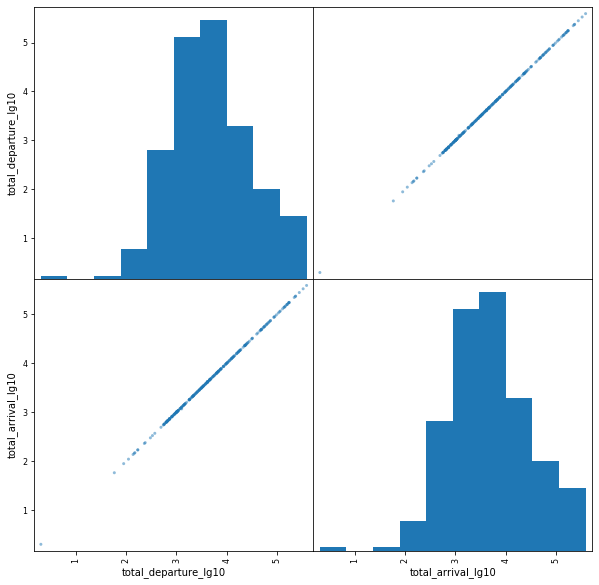

In [50]:
fig = pd.plotting.scatter_matrix(dep_arr_corr_df.loc[:,["total_departure_lg10","total_arrival_lg10"]],figsize=(10,10))

In [51]:
dep_arr_corr_df.loc[:,["total_departure_lg10","total_arrival_lg10"]].corr()

,total_departure_lg10,total_arrival_lg10
total_departure_lg10,1.000000,0.999996
total_arrival_lg10,0.999996,1.000000


As shown by the correlation values, a nearly perfect linear correlation was found between total departure count and total arrival count. This proves that every plane that went into an airport also came out eventually. **Therefore, this (almost) perfect linear relationship indicates that our 'y' datasets capture flights completely with no outliers**.  

In [52]:
alpha = 0.01
st_dep,p_dep = stats.normaltest(dep_arr_corr_df["total_departure_lg10"].values)
st_arr,p_arr = stats.normaltest(dep_arr_corr_df["total_arrival_lg10"].values)
print("P-value for departure_lg10 is :\t",p_dep,"is it normal under alpha =",alpha,"? - ",p_dep>alpha)
print("P-value for arrival_lg10 is :\t",p_arr,"is it normal under alpha =",alpha,"? - ",p_arr>alpha)

P-value for departure_lg10 is :	 0.2540734745102158 is it normal under alpha = 0.01 ? -  True
P-value for arrival_lg10 is :	 0.25535131576566755 is it normal under alpha = 0.01 ? -  True


They are:
- **linear related**: The correlation extremely close to 1.
- **normally distributed**: as tested
- **homoscedasic**: The graph looks consistent.
- **not auto-correlated**: Though arrival depends on departure, the departure count of one airport is unlikely to affect the departure count of another airport.
- **multicollinearity**: This is not a multivariate regression.

Therefore we can conduct a linear regression to see whether there is a biased departure and arrival recording. This is different from above: no outliers indicated no individual airport have significantly different departure / arrival ratio from other airports. Now what we want to test is the ratio 1.

In [53]:
outcome_1,predictors_1 = patsy.dmatrices('total_arrival_lg10 ~ total_departure_lg10',dep_arr_corr_df)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:     total_arrival_lg10   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.107e+07
Date:                Mon, 16 Mar 2020   Prob (F-statistic):               0.00
Time:                        11:10:37   Log-Likelihood:                 1389.2
No. Observations:                 293   AIC:                            -2774.
Df Residuals:                     291   BIC:                            -2767.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.0007 

The effect size is **1.0002**, and we have 95% confidence range covers **1.000**. i.e. For any increase in log10(departure), we have >95%% confidence that there will be 1.000 \* that amount of increase in log10(arrival). Although the intercept is -0.0007, the 95% confidence range covers 0, so we can conclude that the error is small enough to ignore. **Therefore, this shows that the delay dataset is complete - departure and arrival recordings are not biased.** 

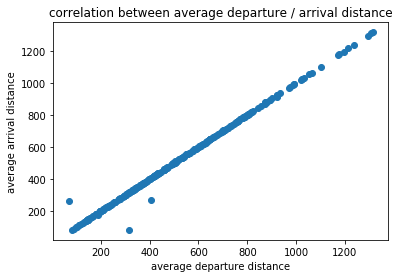

In [54]:
fig1 = plt.scatter(dep_arr_corr_df["departure_distance_avg"],dep_arr_corr_df["arrival_distance_avg"])
plt.title("correlation between average departure / arrival distance")
plt.xlabel("average departure distance")
plt.ylabel("average arrival distance");

Additionally, we found an overall linear relationship between average departure distance and average arrival distance. This could be possibly explained by the fact that for any pair of cities, there often exist airlines that go to and come back from destination.

Correlation:  0.7483774861746597


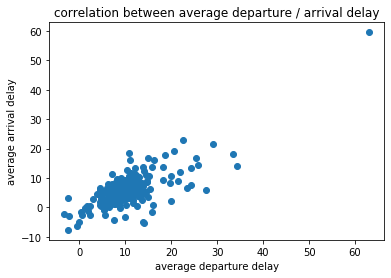

In [55]:
fig1 = plt.scatter(dep_arr_corr_df["departure_delay_avg"],dep_arr_corr_df["arrival_delay_avg"])
plt.title("correlation between average departure / arrival delay")
plt.xlabel("average departure delay")
plt.ylabel("average arrival delay");
print("Correlation: ",np.corrcoef(dep_arr_corr_df["departure_delay_avg"],dep_arr_corr_df["arrival_delay_avg"])[1][0])

- Departure delay and arrival delay is not linearly(strongly) correlated. Therefore, we need to analyze departure delay and arrival delay separately.


- The axis scale of departure and arrival delay are different: arrival delay is less then departure delay. 


- There exisis an outlier who have an average delay of 1hr.

In [56]:
merged_X_df[dep_arr_corr_df["departure_delay_avg"]==dep_arr_corr_df["departure_delay_avg"].max()]

,departure_distance_avg,arrival_distance_avg,departure_taxi_avg,arrival_taxi_avg,city_name,code4,latitude,longitude,altitude_ft,city_id,...,pcp_avg,strike_avg,damage_avg,enplanements,length_ft_sum,width_ft_avg,runway_count,security_avg,total_departure_lg10,total_arrival_lg10
YNG,894.0,894.0,38.5,11.5,youngstown,KYNG,41.2607,-80.6791,1192.0,21828,...,3.509461,0.0,0.0,2636.0,17505.0,120.0,3.0,1.0,0.30103,0.30103


The outlier have only 2 total departure, which is unusally small for a commercial airport. **We will remove all airports that have fewer then 50 departures annually in our following analysis** 

In [57]:
n_before = Y.shape[0]

Y = Y[merged_X_df["total_departure_lg10"] >= np.log10(50)]
merged_X_df = merged_X_df[merged_X_df["total_departure_lg10"] >= np.log10(50)]

n_after = Y.shape[0]
print("We removed ",n_before - n_after," airports from our sample with total_departure < 50.")

dep_arr_corr_df = merged_X_df.loc[:,["total_departure_lg10","total_arrival_lg10",
                                     "departure_distance_avg","arrival_distance_avg"]].merge(Y.loc[:,["departure_delay_avg","arrival_delay_avg"]],left_index=True,right_index=True)

We removed  1  airports from our sample with total_departure < 50.


Departure and arrival delay have correlation:  0.6374752913216907 with p value  1.0545090359129263e-34
Is this correlation a significant result under alpha = 0.01 ? -  True


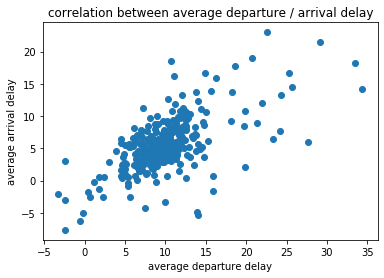

In [58]:
fig1 = plt.scatter(dep_arr_corr_df["departure_delay_avg"],dep_arr_corr_df["arrival_delay_avg"])
plt.title("correlation between average departure / arrival delay")
plt.xlabel("average departure delay")
plt.ylabel("average arrival delay");

corr_coef, pval = stats.pearsonr(dep_arr_corr_df["departure_delay_avg"],dep_arr_corr_df["arrival_delay_avg"])

print("Departure and arrival delay have correlation: ",np.corrcoef(dep_arr_corr_df["departure_delay_avg"],dep_arr_corr_df["arrival_delay_avg"])[1][0],"with p value ",pval)
print("Is this correlation a significant result under alpha =",alpha,"? - ",pval<alpha)

As shown in the graph and P-val test, **there are significant correlation between departure and arrival delay performance. However, the correlation is not strong enough for them to be considered identical**, which further proves the necessity of **analyzing departure and arrival performance separately**.


We can also see from the graph(the axes) that the scales of departure and arrival delay are different - that of arrival delay is slightly smaller than departure delay. We need to do a linear regression to find out the coefficient.

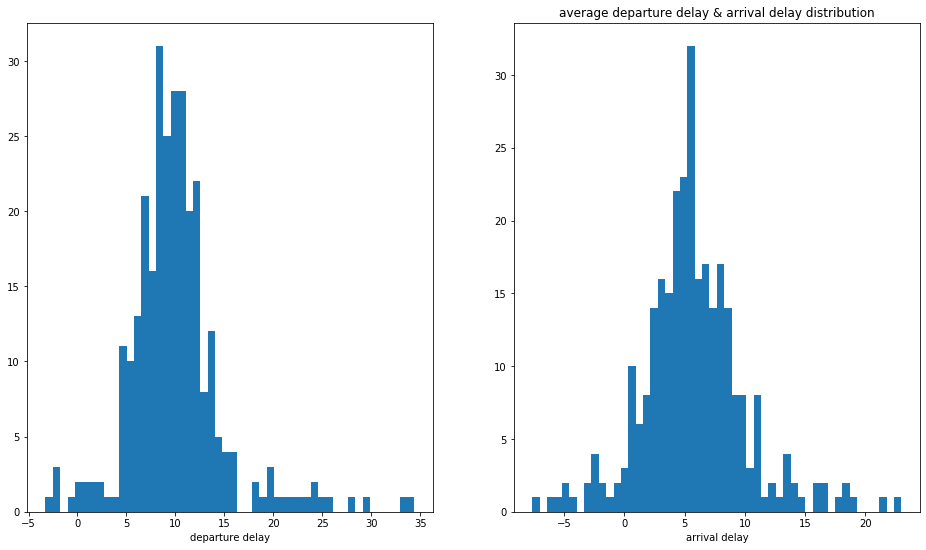

In [59]:
dat1 = dep_arr_corr_df["departure_delay_avg"]
dat2 = dep_arr_corr_df["arrival_delay_avg"]

f, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,9))
ax1.hist(dat1,bins=50)
plt.title("average departure delay & arrival delay distribution")
ax1.set_xlabel("departure delay");
ax1.set_label("count");
ax2.hist(dat2,bins=50)
ax2.set_xlabel("arrival delay"); # update --YD
ax2.set_label("count");

In [60]:
alpha = 0.01
st_dep,p_dep = stats.normaltest(dep_arr_corr_df["departure_delay_avg"].values)
st_arr,p_arr = stats.normaltest(dep_arr_corr_df["arrival_delay_avg"].values)
print("P-value for departure_delay_avg is :\t",p_dep,"is it normal under alpha =",alpha,"? - ",p_dep>alpha)
print("P-value for arrival_delay_avg is :\t",p_arr,"is it normal under alpha =",alpha,"? - ",p_arr>alpha)

P-value for departure_delay_avg is :	 7.689332076455593e-22 is it normal under alpha = 0.01 ? -  False
P-value for arrival_delay_avg is :	 4.41818925880497e-07 is it normal under alpha = 0.01 ? -  False


Although the distribution looks fairly normal, the test result rejects such assupmtion. After mutliple attempts, we could not find a way to transform it. Linear regression does not work well here. 

We then ask the question: **Is there a significant difference between the mean of departure and arrival delay? If so, how large is the difference?**

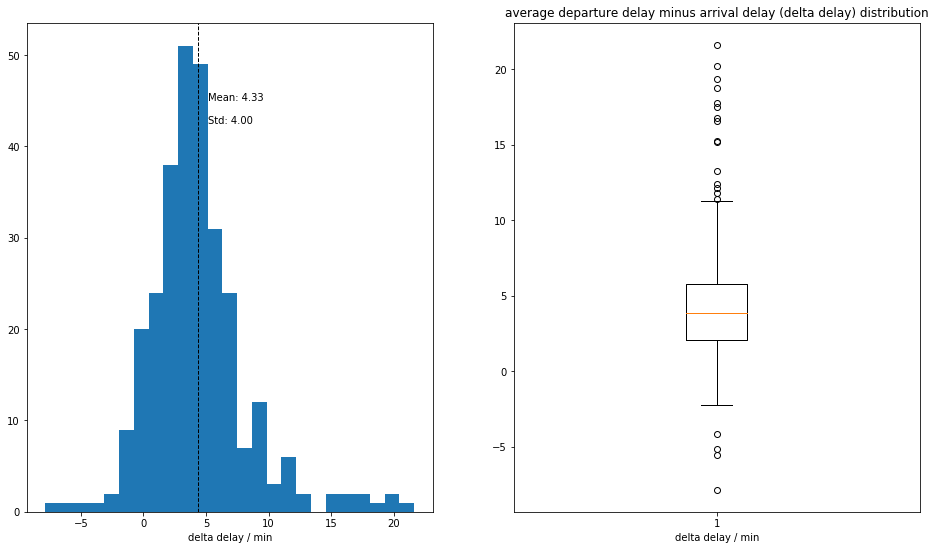

In [61]:
dat = (dep_arr_corr_df["departure_delay_avg"] - dep_arr_corr_df["arrival_delay_avg"]).values;

f, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,9))
plt.title("average departure delay minus arrival delay (delta delay) distribution")
ax1.hist(dat,bins=25)
ax1.set_xlabel("delta delay / min");
ax1.set_label("count");
ax1.axvline(dat.mean(), color='k', linestyle='dashed', linewidth=1)
ax1.text(dat.mean()*1.2, 50*0.9, 'Mean: {:.2f}'.format(dat.mean()))
ax1.text(dat.mean()*1.2, 50*0.85, 'Std: {:.2f}'.format(dat.std()))

ax2.boxplot(dat)
ax2.set_xlabel("delta delay / min");
ax2.set_label("count");

In [62]:
dep_larger_ratio = sum(dat>0) / len(dat) * 100
print("{0:.2f}% of our sample airport have larger departure delay".format(dep_larger_ratio))

91.10% of our sample airport have larger departure delay


The mean of the difference (departure delay minus arrival delay) is **4.33 minutes with a standard deviation 4.00**. According to the plot, arrival delay on average is 4.33 minutes less then departure delay. **91.13% of our sample airport have a larger departure delay**. We figured this difference have a reasonable explanation: After delayed by the originating airport, pilots would typically cruise at a faster speed to catch up with the schedule.

### Geospatial distribution
Are our predictor variables ('x') correlated with location? Are our outcome variables ('y') correlated with location? In other words, is location a possible covariate behind the correlation between our predictor and outcome variables?

In [63]:
def generate_bubble_map(df,column,limits,color,title,scale=1):

    if not (column in df.columns):
        print("column \""+column+"\"","not found in dataframe")
        return
    
    if not ('longitude' in df.columns and 'latitude' in df.columns):
        print("longitude or latitude not present in df")
        return
    
    try:
        n = int(limits) + 1
        lims = np.linspace(df[column].min()-abs(df[column].min())*0.001,df[column].max() + abs(df[column].max())*0.001,n)
        # subtract / add a small number to aviod rouding error that will left out max / min
        limits = list()
        for i in range(n):
            limits.append((lims[i],lims[i+1]))
        
    except:
        _ = 0 # do nothing
    
    
    if not (limits[0][0] <= df[column].min()):
        print("lower limit is higher then some of the rows")
        print("df[" + column + "].min()=",df[column].min())
    
    if not (limits[len(limits)-1][1] >= df[column].max()):
        print("upper limit is lower then some of the rows")
        print("df[" + column + "].max()=",df[column].max())
    
    #preprocess color
    colorseries={
        "blue":["#f7fbff", "#ebf3fb", "#d2e3f3", "#c6dbef", "#b3d2e9", "#9ecae1",
                "#85bcdb", "#6baed6", "#57a0ce", "#3082be", "#2171b5", "#1361a9",
                "#08519c", "#0b4083", "#08306b"],
        "gray":["#ffffff","#eeeeee","#dddddd","#cccccc","#bbbbbb","#aaaaaa","#999999","#888888"],
        "thermal":["#00000a","#000014","#00001e","#000025","#00002a","#00002e","#000032","#000036","#00003a","#00003e","#000042","#000046","#00004a","#00004f","#000052","#010055","#010057","#020059","#02005c","#03005e","#040061","#040063","#050065","#060067","#070069","#08006b","#09006e","#0a0070","#0b0073","#0c0074","#0d0075","#0d0076","#0e0077","#100078","#120079","#13007b","#15007c","#17007d","#19007e","#1b0080","#1c0081","#1e0083","#200084","#220085","#240086","#260087","#280089","#2a0089","#2c008a","#2e008b","#30008c","#32008d","#34008e","#36008e","#38008f","#390090","#3b0091","#3c0092","#3e0093","#3f0093","#410094","#420095","#440095","#450096","#470096","#490096","#4a0096","#4c0097","#4e0097","#4f0097","#510097","#520098","#540098","#560098","#580099","#5a0099","#5c0099","#5d009a","#5f009a","#61009b","#63009b","#64009b","#66009b","#68009b","#6a009b","#6c009c","#6d009c","#6f009c","#70009c","#71009d","#73009d","#75009d","#77009d","#78009d","#7a009d","#7c009d","#7e009d","#7f009d","#81009d","#83009d","#84009d","#86009d","#87009d","#89009d","#8a009d","#8b009d","#8d009d","#8f009c","#91009c","#93009c","#95009c","#96009b","#98009b","#99009b","#9b009b","#9c009b","#9d009b","#9f009b","#a0009b","#a2009b","#a3009b","#a4009b","#a6009a","#a7009a","#a8009a","#a90099","#aa0099","#ab0099","#ad0099","#ae0198","#af0198","#b00198","#b00198","#b10197","#b20197","#b30196","#b40296","#b50295","#b60295","#b70395","#b80395","#b90495","#ba0495","#ba0494","#bb0593","#bc0593","#bd0593","#be0692","#bf0692","#bf0692","#c00791","#c00791","#c10890","#c10990","#c20a8f","#c30a8e","#c30b8e","#c40c8d","#c50c8c","#c60d8b","#c60e8a","#c70f89","#c81088","#c91187","#ca1286","#ca1385","#cb1385","#cb1484","#cc1582","#cd1681","#ce1780","#ce187e","#cf187c","#cf197b","#d01a79","#d11b78","#d11c76","#d21c75","#d21d74","#d31e72","#d32071","#d4216f","#d4226e","#d5236b","#d52469","#d62567","#d72665","#d82764","#d82862","#d92a60","#da2b5e","#da2c5c","#db2e5a","#db2f57","#dc2f54","#dd3051","#dd314e","#de324a","#de3347","#df3444","#df3541","#df363d","#e0373a","#e03837","#e03933","#e13a30","#e23b2d","#e23c2a","#e33d26","#e33e23","#e43f20","#e4411d","#e4421c","#e5431b","#e54419","#e54518","#e64616","#e74715","#e74814","#e74913","#e84a12","#e84c10","#e84c0f","#e94d0e","#e94d0d","#ea4e0c","#ea4f0c","#eb500b","#eb510a","#eb520a","#eb5309","#ec5409","#ec5608","#ec5708","#ec5808","#ed5907","#ed5a07","#ed5b06","#ee5c06","#ee5c05","#ee5d05","#ee5e05","#ef5f04","#ef6004","#ef6104","#ef6204","#f06303","#f06403","#f06503","#f16603","#f16603","#f16703","#f16803","#f16902","#f16a02","#f16b02","#f16b02","#f26c01","#f26d01","#f26e01","#f36f01","#f37001","#f37101","#f37201","#f47300","#f47400","#f47500","#f47600","#f47700","#f47800","#f47a00","#f57b00","#f57c00","#f57e00","#f57f00","#f68000","#f68100","#f68200","#f78300","#f78400","#f78500","#f78600","#f88700","#f88800","#f88800","#f88900","#f88a00","#f88b00","#f88c00","#f98d00","#f98d00","#f98e00","#f98f00","#f99000","#f99100","#f99200","#f99300","#fa9400","#fa9500","#fa9600","#fb9800","#fb9900","#fb9a00","#fb9c00","#fc9d00","#fc9f00","#fca000","#fca100","#fda200","#fda300","#fda400","#fda600","#fda700","#fda800","#fdaa00","#fdab00","#fdac00","#fdad00","#fdae00","#feaf00","#feb000","#feb100","#feb200","#feb300","#feb400","#feb500","#feb600","#feb800","#feb900","#feb900","#feba00","#febb00","#febc00","#febd00","#febe00","#fec000","#fec100","#fec200","#fec300","#fec400","#fec500","#fec600","#fec700","#fec800","#fec901","#feca01","#feca01","#fecb01","#fecc02","#fecd02","#fece03","#fecf04","#fecf04","#fed005","#fed106","#fed308","#fed409","#fed50a","#fed60a","#fed70b","#fed80c","#fed90d","#ffda0e","#ffda0e","#ffdb10","#ffdc12","#ffdc14","#ffdd16","#ffde19","#ffde1b","#ffdf1e","#ffe020","#ffe122","#ffe224","#ffe226","#ffe328","#ffe42b","#ffe42e","#ffe531","#ffe635","#ffe638","#ffe73c","#ffe83f","#ffe943","#ffea46","#ffeb49","#ffeb4d","#ffec50","#ffed54","#ffee57","#ffee5b","#ffee5f","#ffef63","#ffef67","#fff06a","#fff06e","#fff172","#fff177","#fff17b","#fff280","#fff285","#fff28a","#fff38e","#fff492","#fff496","#fff49a","#fff59e","#fff5a2","#fff5a6","#fff6aa","#fff6af","#fff7b3","#fff7b6","#fff8ba","#fff8bd","#fff8c1","#fff8c4","#fff9c7","#fff9ca","#fff9cd","#fffad1","#fffad4","#fffbd8","#fffcdb","#fffcdf","#fffde2","#fffde5","#fffde8","#fffeeb","#fffeee","#fffef1","#fffef4","#fffff6"],
        "black":["#bbbbbb","#aaaaaa","#999999","#888888","#777777","#666666","#555555","#444444","#333333","#222222","#111111","#000000"]
    }
    colors = list()
    inds = list(np.linspace(0,len(colorseries[color])-1,len(limits)).astype("int"))
    for i in inds:
        colors.append(colorseries[color][i])
        
    scale *= 250 / (df[column].max() - df[column].min())
    
    fig = go.Figure()
    for i in range(len(limits)):
        lim = limits[i]
        df_sub = df[(lim[0]<=df[column]) & (df[column]<lim[1])]
        fig.add_trace(go.Scattergeo(
            locationmode = 'USA-states',
            lon = df_sub['longitude'],
            lat = df_sub['latitude'],
            text = df_sub.index,
            marker = dict(
                size = (df_sub[column] - df[column].min())*scale, # ensure size is positive
                color = colors[i],
                line_color='rgb(40,40,40)',
                line_width=0,
                sizemode = 'area'
            ),
            name = '{0:.3g} - {1:.3g}'.format(lim[0],lim[1])))

    fig.update_layout(
            title_text = title,
            showlegend = True,
            geo = dict(
                scope = 'usa',
                landcolor = 'rgb(217, 217, 217)',
            )
        )
    return fig

### Outcome variables

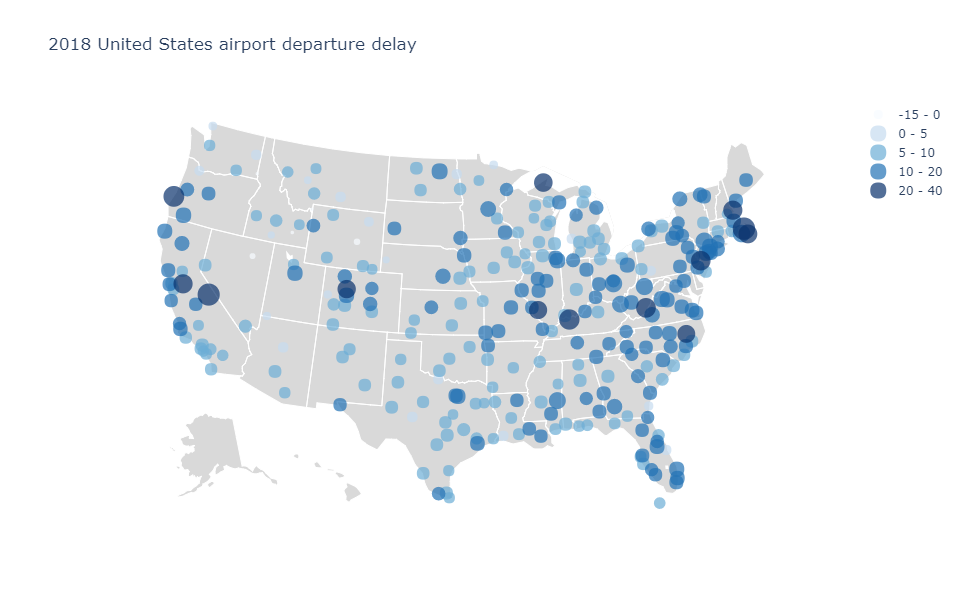

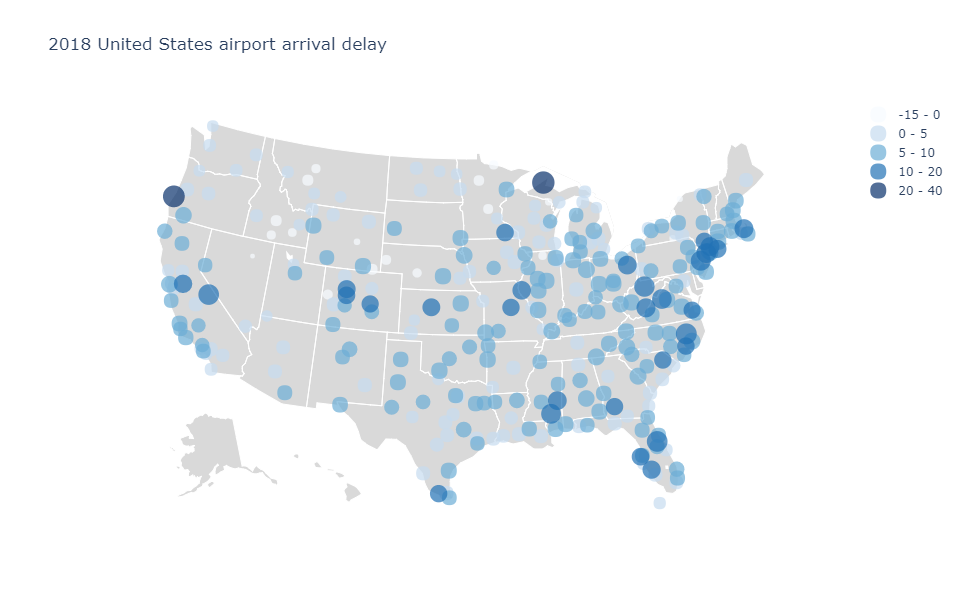

In [64]:
fig1 = generate_bubble_map(Y.merge(merged_X_df[["latitude","longitude"]],left_index=True,right_index=True),
                          column="departure_delay_avg",
                          limits=[(-15,0),(0,5),(5,10),(10,20),(20,40)],
                          color="blue",
                          title='2018 United States airport departure delay')
#fig1.show()
fig1.write_image("images/dep_delay.png",width=960,height=600)
fig2 = generate_bubble_map(Y.merge(merged_X_df[["latitude","longitude"]],left_index=True,right_index=True),
                          column="arrival_delay_avg",
                          limits=[(-15,0),(0,5),(5,10),(10,20),(20,40)],
                          color="blue",
                          title='2018 United States airport arrival delay')
#fig2.show()
fig2.write_image("images/arr_delay.png",width=960,height=600)
display(Image(filename='images/dep_delay.png'))
display(Image(filename='images/arr_delay.png'))

From the figure above, we found:
- Arrival delay is overall less than departure delay (consistent with previous finding).
     
- The triangular region (from center of Nevada to U.S. - Canadian boarder) in the upper left of the map has overall less departure and arrival delay. 
    
- Both departure and arrival delays tend to distribute along the coastline.

These findings lead us to raise question: Is there a significant difference of departure/arrival delay between airports that are located at a coastal state and ones that are not? We answered this question in the analysis section. 

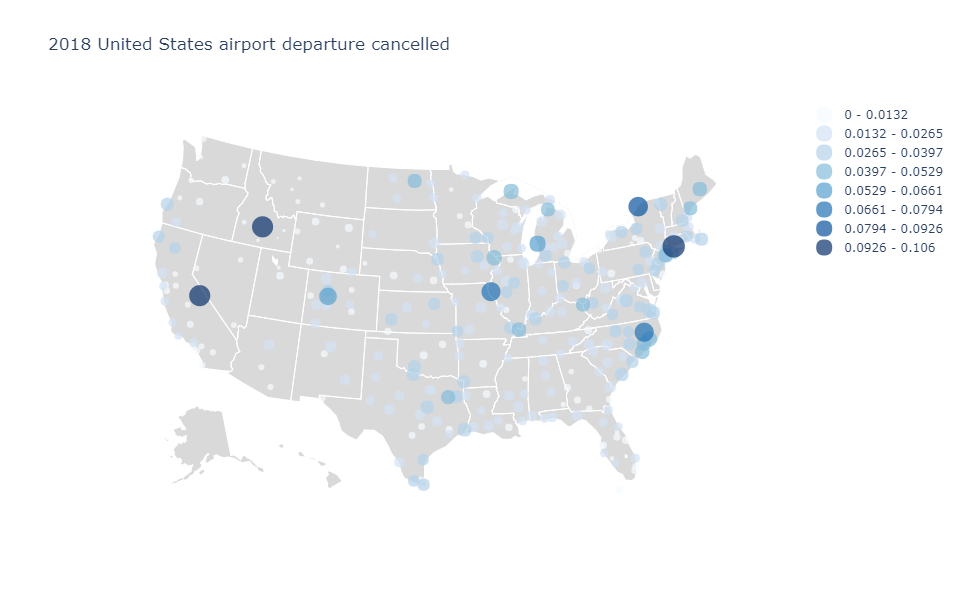

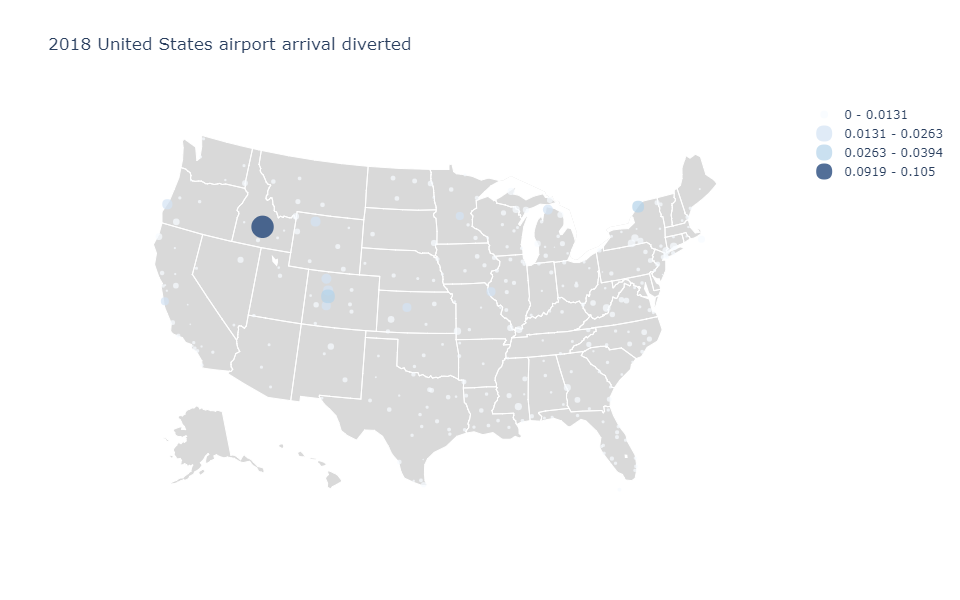

In [65]:
fig1 = generate_bubble_map(Y.merge(merged_X_df[["latitude","longitude"]],left_index=True,right_index=True),
                          column="departure_cancelled_avg",
                          limits=8,
                          color="blue",
                          title='2018 United States airport departure cancelled')
#fig1.show()
fig1.write_image("images/dep_cancel.png",width=960,height=600)
fig2 = generate_bubble_map(Y.merge(merged_X_df[["latitude","longitude"]],left_index=True,right_index=True),
                          column="arrival_diverted_avg",
                          limits=8,
                          color="blue",
                          title='2018 United States airport arrival diverted')
#fig2.show()
fig2.write_image("images/arr_divert.png",width=960,height=600)
display(Image(filename='images/dep_cancel.png'))
display(Image(filename='images/arr_divert.png'))

- East coast have greater cancel rate, cancel rate may be correlated with longitude.


- There's a outlier of divert rate in state Idaho

In [66]:
# The outlier:
merged_X_df[Y["arrival_diverted_avg"]==Y["arrival_diverted_avg"].max()]

,departure_distance_avg,arrival_distance_avg,departure_taxi_avg,arrival_taxi_avg,city_name,code4,latitude,longitude,altitude_ft,city_id,...,pcp_avg,strike_avg,damage_avg,enplanements,length_ft_sum,width_ft_avg,runway_count,security_avg,total_departure_lg10,total_arrival_lg10
SUN,334.876766,334.637431,15.435009,2.807292,hailey,KSUN,43.504398,-114.295998,5318.0,19830,...,1.472988,0.25,0.0,93280.0,6952.0,100.0,1.0,2.434783,3.105169,3.106191


The outlier have reasonable enplanements: 133281. And we inspected the raw data, there's no nan for cancelled. Therefore we can't remove it from our while dataset. However, there must be some sepcific reason behiend this airport that does not adhere to overall trend. We re-plotted a map with SUN removed(but not from original dataset!)

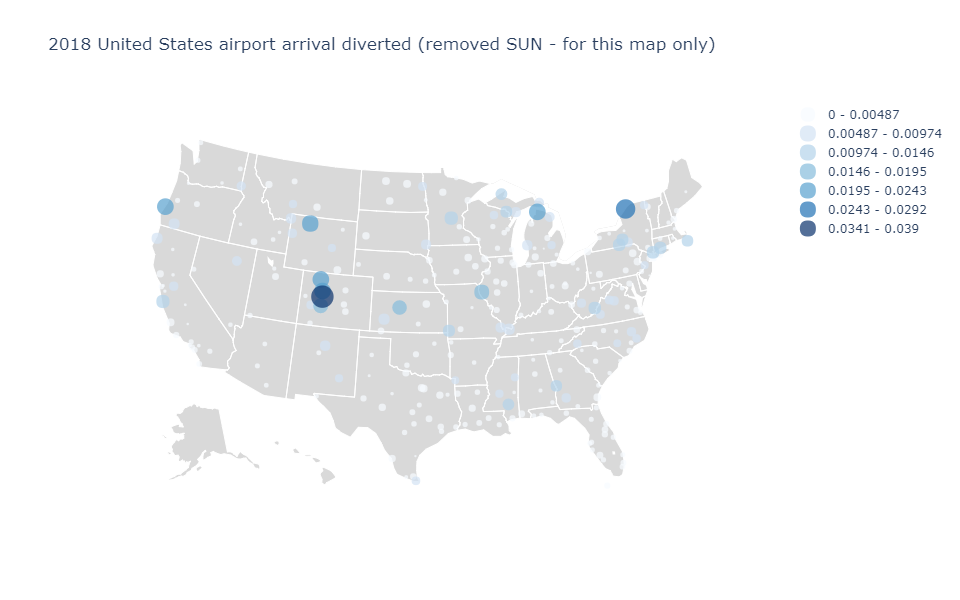

In [67]:
fig2 = generate_bubble_map(Y.merge(merged_X_df[["latitude","longitude"]],left_index=True,right_index=True).drop("SUN",axis=0),
                          column="arrival_diverted_avg",
                          limits=8,
                          color="blue",
                          title='2018 United States airport arrival diverted (removed SUN - for this map only)')
#fig2.show()
fig2.write_image("images/arr_divert_rm_outlier.png",width=960,height=600)

display(Image(filename='images/arr_divert_rm_outlier.png'))

According to this figure, we can see there's a slight trend that there's more cancel / divert rate in non-coastal states. This is analyzed in our Analysis part. 

### Predictor variables

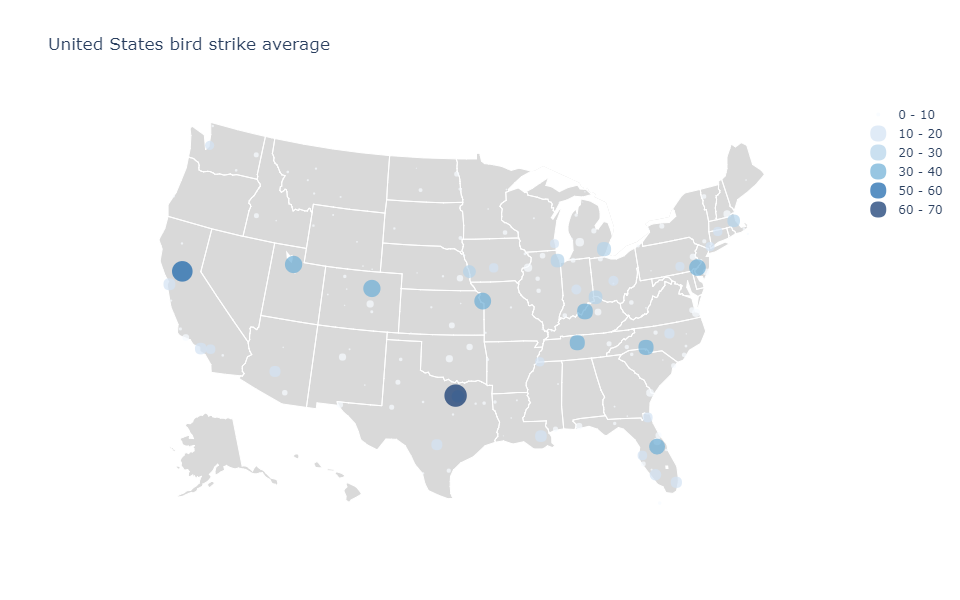

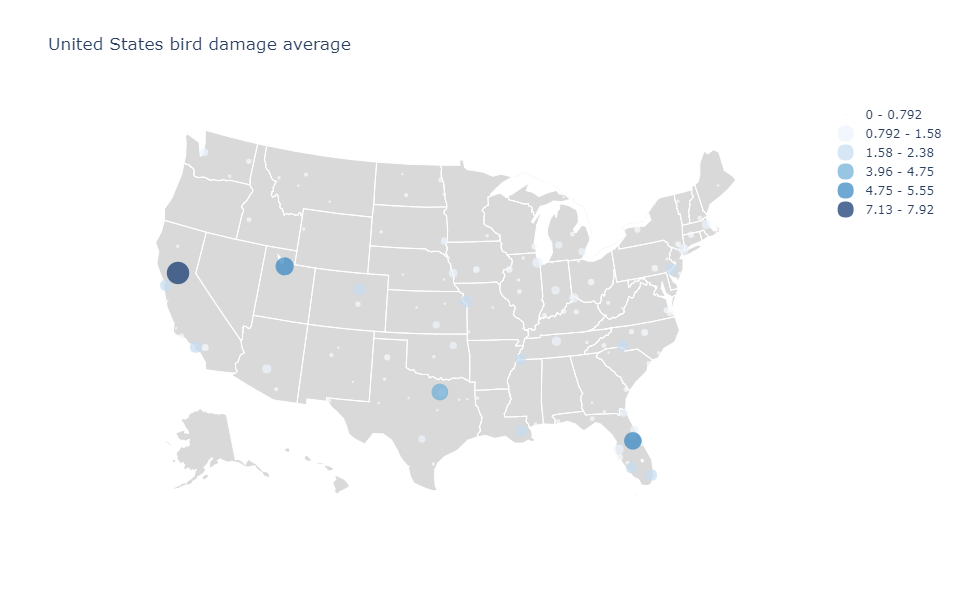

In [68]:
fig = generate_bubble_map(merged_X_df,
                          column="strike_avg",
                          limits=[(0,10),(10,20),(20,30),(30,40),(40,50),(50,60),(60,70)],
                          color="blue",
                          title='United States bird strike average')
fig.write_image("images/bird.png",width=960,height=600)
display(Image(filename='images/bird.png'))
fig = generate_bubble_map(merged_X_df,
                          column="damage_avg",
                          limits=10,
                          color="blue",
                          title='United States bird damage average')
fig.write_image("images/bird_dmg.png",width=960,height=600)
display(Image(filename='images/bird_dmg.png'))

From this plot we can see that bird strikes occur less frequenlty in high latitude areas and more frequently in low latitude areas. Thus it is reasonable to assume bird strikes may be correlated with latitude, or tempreature(climate).

Now let's examine the distribution and correlation:

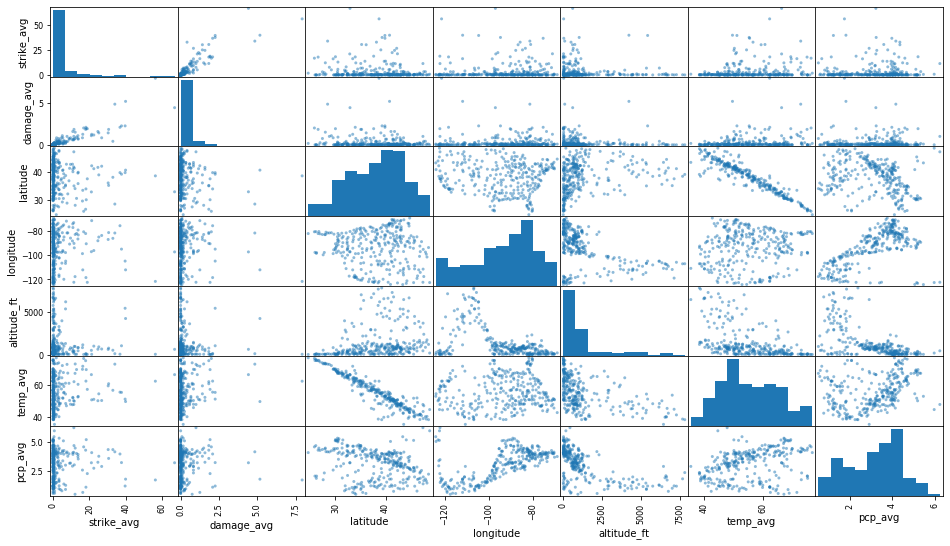

In [69]:
pd.plotting.scatter_matrix(merged_X_df[["strike_avg","damage_avg","latitude","longitude","altitude_ft","temp_avg","pcp_avg"]],figsize=(16,9));

Correlation between bird strike and climate & location- Removed self correlation


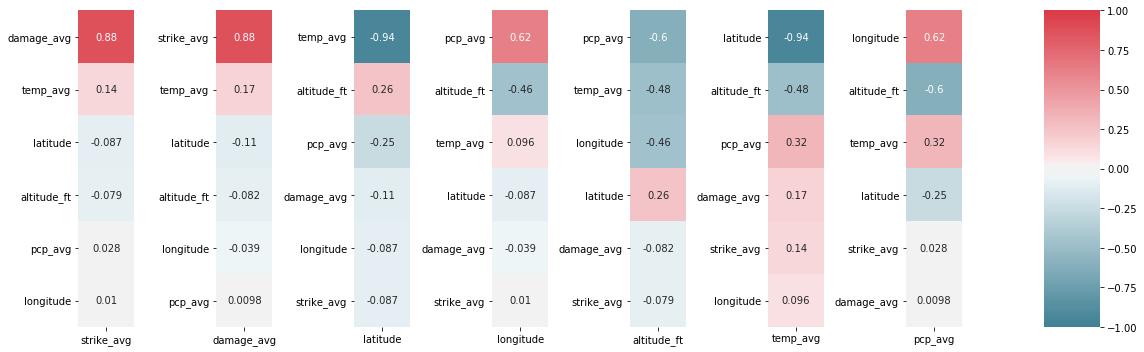

In [70]:
corrs = merged_X_df[["strike_avg","damage_avg","latitude","longitude","altitude_ft","temp_avg","pcp_avg"]].corr()

f, axes = plt.subplots(1, 8,figsize=(16,5))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
print('Correlation between bird strike and climate & location- Removed self correlation')
for i in range(7):
    rank = ((-corrs.iloc[i,:].abs()).argsort())
    rank = corrs.iloc[i,rank[1:]].to_frame(name=corrs.index[i])
    sns.heatmap(rank,vmin=-1,vmax=1,center=0.0,cmap=cmap,ax=axes[i],annot=True,cbar_ax=axes[7])
f.tight_layout()
plt.show(f)

The correlation shows **bird strike rate and bird damage rate are weakly correlated with climate & location: latitude, longitude, altitude, precipitation, and tempreature**. There is a weak( ~0.1) negative correlation between latitude/altitude and bird strike/damage rate and a weak positive correlation between tempreature and bird strike/damage rate. There is no correlation between precipitation and bird strike/damage rate.

Besides bird strike rate, there is a **strong (-0.94) negative correlation between tempreature and latitute** as we expected. Due to more rain in the East coast, there's a **strong (0.62) positive correlation between longitude and precipitation**.

A possible explanation could be birds perfer and gather in warmer habitats, increasing the possiblity of collision. 

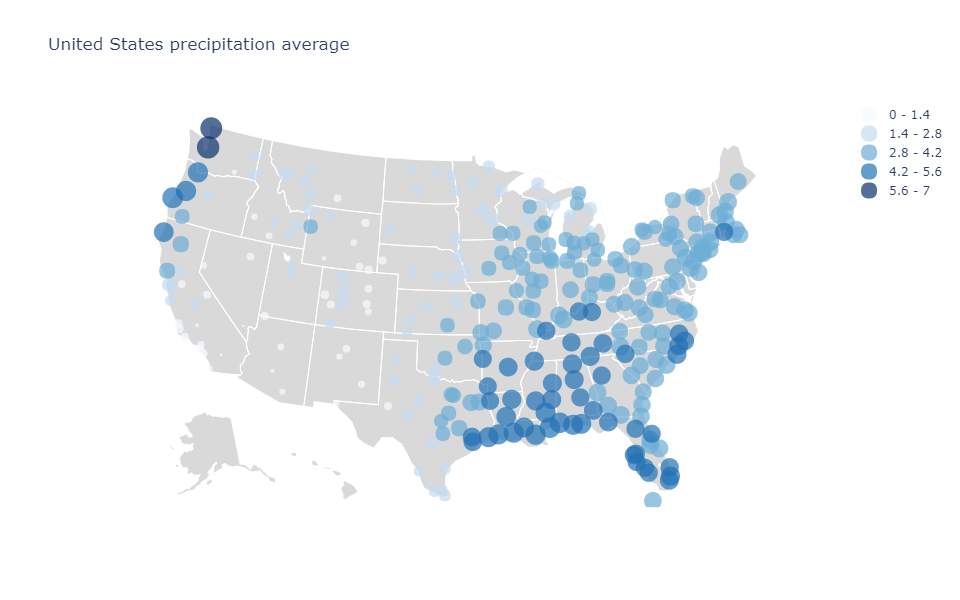

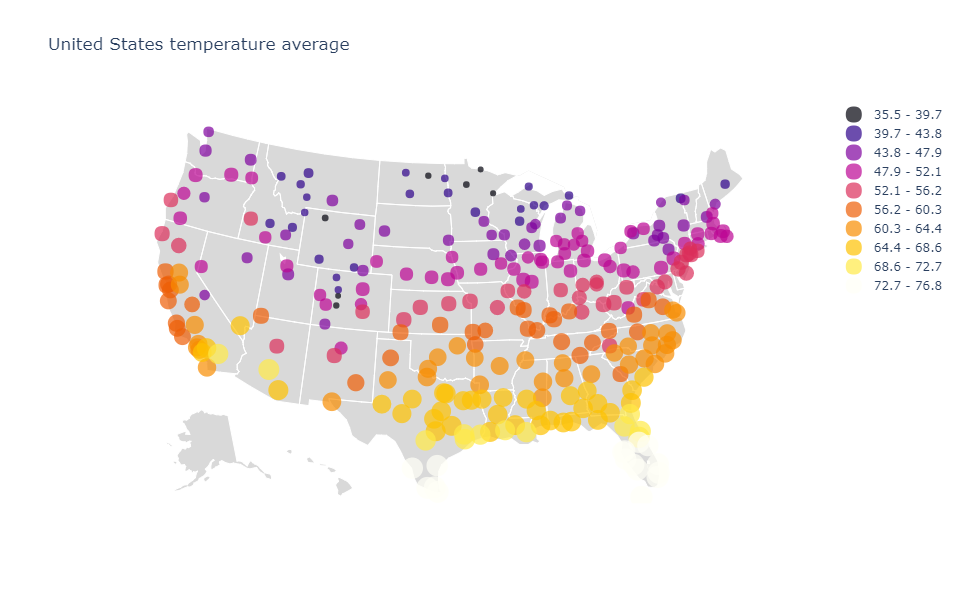

In [71]:
fig = generate_bubble_map(merged_X_df,
                          column="pcp_avg",
                          limits=[(0,1.4),(1.4,2.8),(2.8,4.2),(4.2,5.6),(5.6,7.0)],
                          color="blue",
                          title='United States precipitation average')
#fig.show()
fig.write_image("images/pcp.png",width=960,height=600)
display(Image(filename='images/pcp.png'))

fig = generate_bubble_map(merged_X_df,
                          column="temp_avg",
                          limits=10,
                          color="thermal",
                          title='United States temperature average')
fig.write_image("images/temp.png",width=960,height=600)
display(Image(filename='images/temp.png'))

This figure validates our data by showing more percipitation in the east than west, and higher temperature in the south than the north, which is aligned with facts of the U.S. climate.

Lastly, we checked for our enplanements variable. 
We chose to take the log of enplanements since they are in different magnitude.

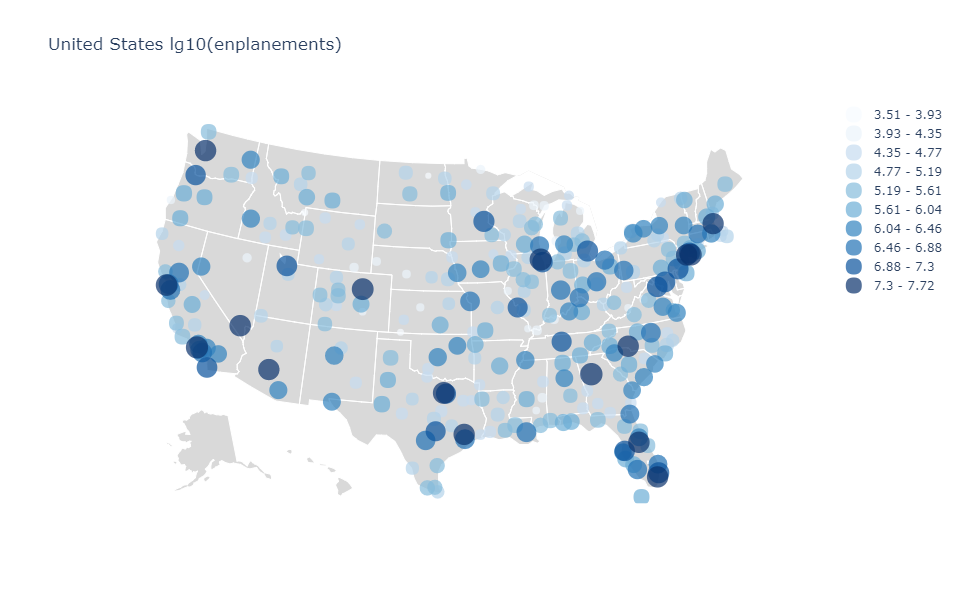

In [72]:
merged_X_df_temp = merged_X_df.copy()
merged_X_df_temp["enplanements"] = merged_X_df_temp["enplanements"].apply(np.log10)
fig = generate_bubble_map(merged_X_df_temp,
                          column="enplanements",
                          limits=10,
                          color="blue",
                          title='United States lg10(enplanements)')
fig.write_image("images/enplanements.png",width=960,height=600)
display(Image(filename='images/enplanements.png'))

The region in upper left, where there are fewer delays, also has fewer enplanements. This indicates flight delay may be correlated with enplanements.

###  Distribution of Other Variables 

Now we want to know whether the distribution of each variable is reasonalbe or not.
We want to use box plots to check the outliers and use histogram to check the distributions.

#### Environmental Factors: Tempreature, Precipitation, Bird Strike

In [73]:
merged_X_df['temp_avg'].describe()

count    292.000000
mean      55.470855
std        9.615236
min       35.578008
25%       48.055809
50%       54.481120
75%       62.925934
max       76.737344
Name: temp_avg, dtype: float64

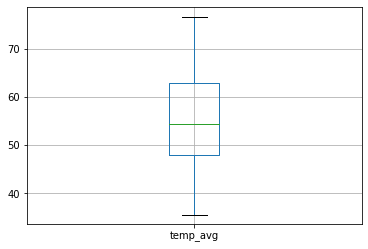

In [74]:
merged_X_df.boxplot(column = ['temp_avg'])
f1 = plt.gcf()

There is no outlier or extreme outlier in the dataset. The maximum temperature is about 76.73 and the minimum temperature is about 35.58. It statisfies our normal cognition about the distribution of temperature in U.S.

In [75]:
merged_X_df['pcp_avg'].describe()

count    292.000000
mean       3.117574
std        1.261108
min        0.512697
25%        1.986058
50%        3.310892
75%        4.082168
max        6.242822
Name: pcp_avg, dtype: float64

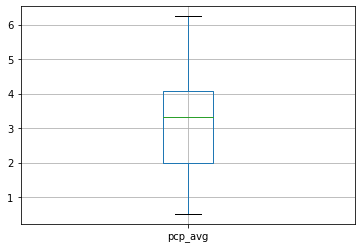

In [76]:
merged_X_df.boxplot(column = ['pcp_avg'])
f1 = plt.gcf()

There is no outlier or extreme outlier in the dataset. The maximum temperature is about 6.29 and the minimum temperature is about 0.24. It statisfies our normal cognition about the distribution of precipitation in U.S. The cities on the coastline will have apparently high precipitation, and cities in the middle part of U.S will have very low precipitation.

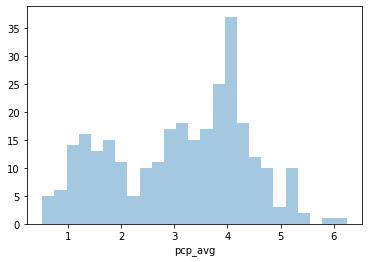

In [77]:
sns.distplot(merged_X_df['pcp_avg'],kde = False, bins = 25)
f1 = plt.gcf()

The distribution of average of precipitation is reasonable. According to geography, the cities in the southwest of U.S have the lowest precipitation because of mediterranean climate, and the cities in the northwest of U.S have the highest precipitation because of temperate marine climate. Then because of American Cordillera, the vapour cannot go to the middle part of U.S. The precipitation of middle and east of U.S will decrease progressively from east to west. According to the geographic analysis, we find out that the distribution is just like what we know. 

In [78]:
merged_X_df['strike_avg'].describe()

count    292.000000
mean       3.718037
std        8.740922
min        0.000000
25%        0.000000
50%        0.250000
75%        2.666667
max       66.916667
Name: strike_avg, dtype: float64

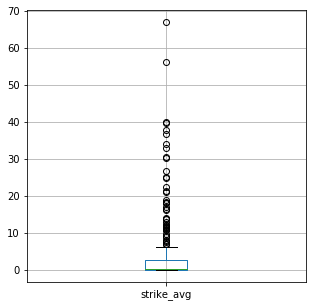

In [79]:
merged_X_df.boxplot(column = ['strike_avg'],figsize = (5,5))
f4 = plt.gcf()

We have only positive data, as expected. There are >=25% of the airports didn't have bird strikes in years 2000 - 2011.

#### Density Factors: Enplanements, Nearest City Population

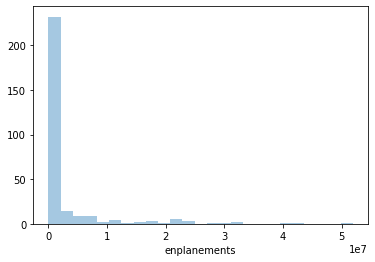

In [80]:
sns.distplot(merged_X_df['enplanements'],kde = False, bins = 25);

The distribution is extremely skewed to the left. It makes sense because the amount of super large scale airports is very small in U.S. Most of the airports are in middle and small scale. The data is distributed along multiple orders of magnitude, so we take the log transform of this column.

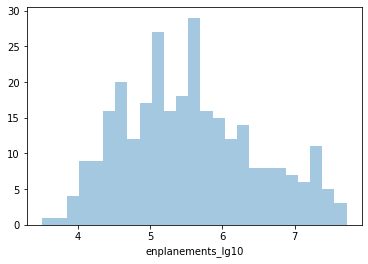

In [81]:
merged_X_df['enplanements_lg10'] = merged_X_df['enplanements'].apply(np.log10)
merged_X_df = merged_X_df.drop(columns=["enplanements"])
sns.distplot(merged_X_df['enplanements_lg10'],kde = False, bins = 25);

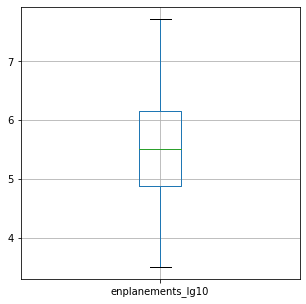

In [82]:
merged_X_df.boxplot(column = ['enplanements_lg10'],figsize = [5,5]);

In [83]:
merged_X_df["enplanements_lg10"].describe()

count    292.000000
mean       5.547334
std        0.923610
min        3.509740
25%        4.880313
50%        5.507538
75%        6.159831
max        7.714881
Name: enplanements_lg10, dtype: float64

There are no extereme values for enplanements after the log transform. The scope of the data alignes with our intuition. 

Same holds for city population:

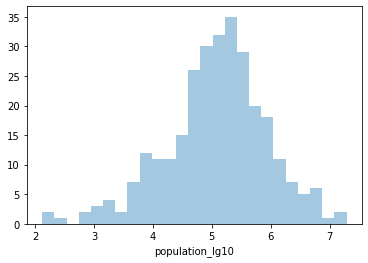

In [84]:
merged_X_df['population_lg10'] = merged_X_df['population'].apply(np.log10)
merged_X_df = merged_X_df.drop(columns=["population"])
sns.distplot(merged_X_df['population_lg10'],kde = False, bins = 25)
f12 = plt.gcf()

In [85]:
merged_X_df['population_lg10'].describe()

count    292.000000
mean       5.074326
std        0.865222
min        2.120574
25%        4.633766
50%        5.136175
75%        5.598346
max        7.286791
Name: population_lg10, dtype: float64

#### Facility Factors: Runway Quantity, Length, Width + Security Check Time

Runway Quantity, Length, Width


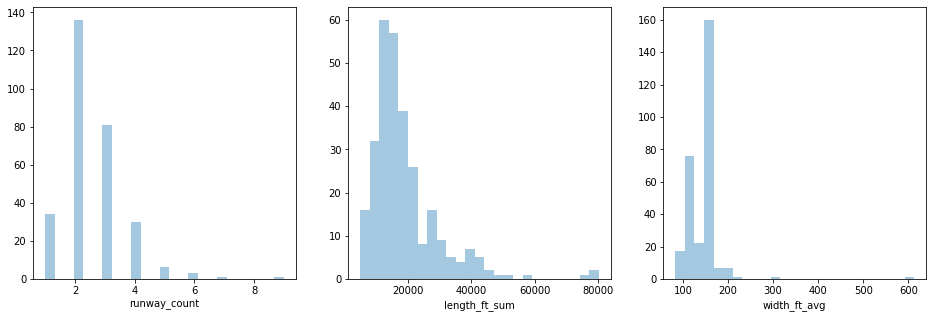

In [86]:
f, axes = plt.subplots(1, 3,figsize=(16,5))
print("Runway Quantity, Length, Width")
sns.distplot(merged_X_df['runway_count'],kde = False, bins = 25,ax=axes[0])
sns.distplot(merged_X_df['length_ft_sum'],kde = False, bins = 25,ax=axes[1])
sns.distplot(merged_X_df['width_ft_avg'],kde = False, bins = 25,ax=axes[2]);

All three factors of airport runways skews to the left. The values distribute in a reasonable range.
- There are only integer values for runway count, and most airports have 2 runways. 

- The width have 2 spikes in the data: 100ft and 150ft. We think it might correspond to the minimal requirement of runway width. We found a source to support this hypothesis: https://www.faa.gov/documentlibrary/media/advisory_circular/150-5300-13/150_5300_13_part1.pdf, page25.In this document we found the runway width requirements for airplane design group III and IV are 100ft and 150ft, the same as spikes on the histogram shows.


In [87]:
merged_X_df['security_avg'].describe()

count    292.000000
mean       5.229899
std        5.986741
min        1.000000
25%        1.880952
50%        2.947179
75%        5.766711
max       51.687500
Name: security_avg, dtype: float64

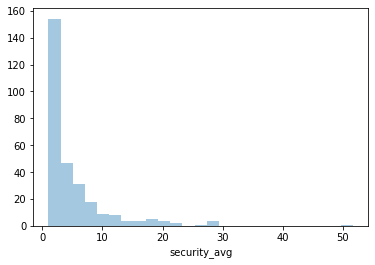

In [88]:
sns.distplot(merged_X_df['security_avg'],kde = False, bins = 25)
f12 = plt.gcf()

Security time average is heavily skewed to the left, and have a range between 1 and 51, with 75% of the waiting time below 5.76 minutes.

#### Correlation between Density and Facility factors

In [89]:
corrs = merged_X_df[['population_lg10','enplanements_lg10','runway_count','length_ft_sum','width_ft_avg','security_avg']].corr() 
corrs

,population_lg10,enplanements_lg10,runway_count,length_ft_sum,width_ft_avg,security_avg
population_lg10,1.000000,0.503906,0.315301,0.395706,0.200052,0.244839
enplanements_lg10,0.503906,1.000000,0.542063,0.656804,0.284975,0.477944
runway_count,0.315301,0.542063,1.000000,0.892175,0.089371,0.280694
length_ft_sum,0.395706,0.656804,0.892175,1.000000,0.259935,0.323327
width_ft_avg,0.200052,0.284975,0.089371,0.259935,1.000000,0.255849
security_avg,0.244839,0.477944,0.280694,0.323327,0.255849,1.000000


<a id="scale_EDA"></a>

Correlation between Density and Facility factors - Removed self correlation


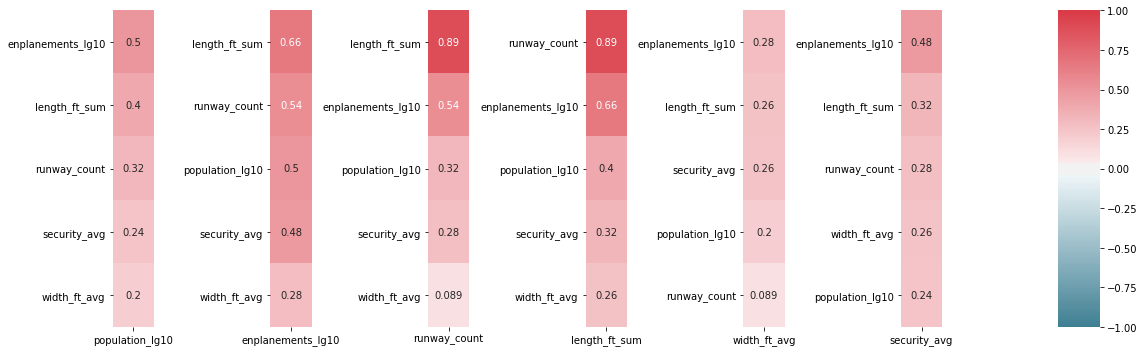

In [90]:
f, axes = plt.subplots(1, 7,figsize=(16,5))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
print('Correlation between Density and Facility factors - Removed self correlation')
for i in range(6):
    rank = ((-corrs.iloc[i,:].abs()).argsort())
    rank = corrs.iloc[i,rank[1:]].to_frame(name=corrs.index[i])
    sns.heatmap(rank,vmin=-1,vmax=1,center=0.0,cmap=cmap,ax=axes[i],annot=True,cbar_ax=axes[6])
f.tight_layout()
plt.show(f)

From the pairwise correlation form, we find that 'enplanements_lg10', 'city_population_lg10', 'length_feet_sum', 'width_feet_avg' and 'security_avg' ,**all Density and Facility factors, have significant positive correlation with eachother** We could explain these correlations well:

- `population_lg10` is most correlated with `enplanements_lg10` - the more people a city have, the more people in the airport.

- `enplanements_lg10` is correlated with `length_ft_sum` and `runway_count`  - the more people an airport needs to send, the more runways the airport need.

- `security_avg` is correlated with `enplanements_lg10` - the more people an airport needs to send, the more crowded is the security and the mode delay in the security check. 

**Since their strong inter-correlation, we aggregate the first 4 properities - local_population, emplanements, runway_count, and, runway length as the "scale" of an airport.** 


# Analysis

### The correlation table

In [91]:
X_num = merged_X_df.drop(columns=["city_name","code4","city_id","fips","state_id"]) # drop non-numerical / not valid for correlation
corrs = X_num.merge(Y,left_index=True,right_index=True).corr()

num_features = X_num.shape[1]
corrs = corrs.iloc[num_features:,0:num_features]
corrs

,departure_distance_avg,arrival_distance_avg,departure_taxi_avg,arrival_taxi_avg,latitude,longitude,altitude_ft,temp_avg,pcp_avg,strike_avg,damage_avg,length_ft_sum,width_ft_avg,runway_count,security_avg,total_departure_lg10,total_arrival_lg10,enplanements_lg10,population_lg10
departure_delay_avg,0.129676,0.123591,-0.006645,0.167061,0.008956,0.280303,-0.166073,-0.022478,0.246265,-0.004420,-0.015139,-0.072791,-0.018579,-0.054205,-0.026968,-0.124711,-0.124469,-0.037699,-0.083614
arrival_delay_avg,-0.098772,-0.092282,0.063398,0.000006,-0.205115,0.272530,-0.157077,0.178051,0.303084,-0.056782,-0.044698,-0.081087,0.033846,-0.057181,-0.044556,-0.006887,-0.006488,-0.022597,-0.000901
departure_cancelled_avg,-0.261386,-0.263789,0.087806,-0.116765,0.055900,0.304372,-0.079336,-0.089783,0.207655,-0.128751,-0.140097,-0.242075,-0.034554,-0.200410,-0.123140,-0.201515,-0.201212,-0.237416,-0.128091
arrival_diverted_avg,-0.064624,-0.061790,0.064880,-0.111147,0.154442,-0.095933,0.259829,-0.235503,-0.087623,-0.110225,-0.093818,-0.207847,-0.137816,-0.201599,-0.081308,-0.241754,-0.241561,-0.244417,-0.285921


We compute the p-value of these correlations to determine is that pair of correlation significant or not. If not, set the value to 0.000

In [92]:
def zero_small_correlation(corrs):
    alpha = 0.01
    for i in range(corrs.shape[0]):
        for j in range(corrs.shape[1]):
            corr_coef, pval = stats.pearsonr(X_num.iloc[i+num_features],X_num.iloc[j])
            if not (pval<alpha):
                corrs.iloc[i,j] = 0.000
zero_small_correlation(corrs)
corrs

,departure_distance_avg,arrival_distance_avg,departure_taxi_avg,arrival_taxi_avg,latitude,longitude,altitude_ft,temp_avg,pcp_avg,strike_avg,damage_avg,length_ft_sum,width_ft_avg,runway_count,security_avg,total_departure_lg10,total_arrival_lg10,enplanements_lg10,population_lg10
departure_delay_avg,0.129676,0.123591,-0.006645,0.167061,0.008956,0.280303,-0.166073,-0.022478,0.246265,-0.004420,-0.015139,-0.072791,-0.018579,-0.054205,-0.026968,-0.124711,-0.124469,-0.037699,-0.083614
arrival_delay_avg,-0.098772,-0.092282,0.063398,0.000006,-0.205115,0.272530,-0.157077,0.178051,0.303084,-0.056782,-0.044698,-0.081087,0.033846,-0.057181,-0.044556,-0.006887,-0.006488,-0.022597,-0.000901
departure_cancelled_avg,-0.261386,-0.263789,0.087806,-0.116765,0.055900,0.304372,-0.079336,-0.089783,0.207655,-0.128751,-0.140097,-0.242075,-0.034554,-0.200410,-0.123140,-0.201515,-0.201212,-0.237416,-0.128091
arrival_diverted_avg,-0.064624,-0.061790,0.064880,-0.111147,0.154442,-0.095933,0.259829,-0.235503,-0.087623,-0.110225,-0.093818,-0.207847,-0.137816,-0.201599,-0.081308,-0.241754,-0.241561,-0.244417,-0.285921


We then rank the coefficients for each Y variable:

Correlation for Airports in U.S. Mainland with Delay / Cancellation


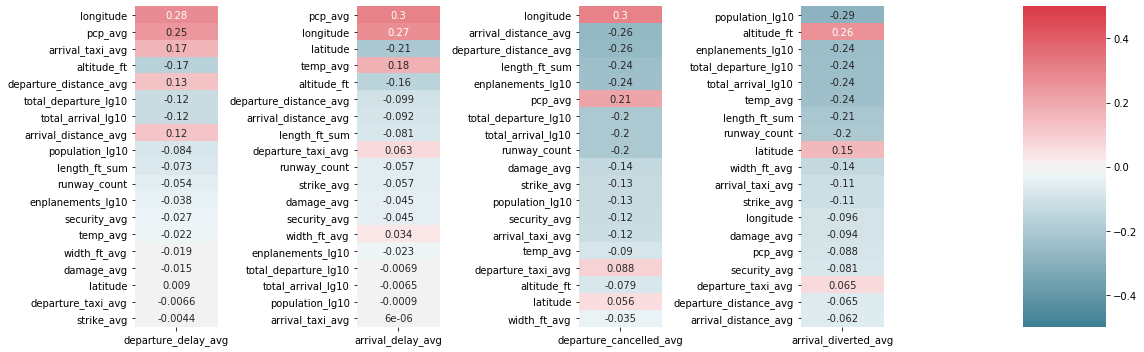

In [93]:
f, axes = plt.subplots(1, 5,figsize=(16,5))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
print('Correlation for Airports in U.S. Mainland with Delay / Cancellation')
for i in range(4):
    rank = ((-corrs.iloc[i,:].abs()).argsort())
    rank = corrs.iloc[i,rank].to_frame(name=corrs.index[i])
    sns.heatmap(rank,vmin=-0.5,vmax=0.5,center=0.0,cmap=cmap,ax=axes[i],annot=True,cbar_ax=axes[4])
f.tight_layout()
plt.show(f)

According to the above correlation table, we made the following observations:

- 1) All correlations between our predictor variables ‘merged_X’ and outcome variables ‘Y’ are **fairly weak**, with the largest correlation coefficient being **0.3**. 


- 2) As for arrival/departure delayed and canceled flights, both longitude and average precipitation show up in their top correlations, with an average correlation coefficient of  **0.28** and **0.25** respectively, which we will consider as relatively large correlations in our case. They imply that **out of all our factors, the longitude and average precipitation of an airport consistently matters the most with flight delay and cancellation rate.** 


- 3) As the polarity of the correlation is indicated by color (positive - red; negative - blue), we could see that **most factors regarding the scale of the airport** (<a href = "#scale_EDA">see this section of EDA</a>) **are negatively correlated with delay/cancellation**. 
 

- 4) The correlation pattern for **average diversion rate (fourth bar) is considerably different** from the previous three, with its largest correlation with the **population and altitude of the airport (0.28)**. 

    - We did not have an appropriate explanation for this, but our guess would be that airports with higher altitude in the U.S. are usually those located among mountains, where environmental conditions (e.g. wind, fog) tend to be less predictable and less ideal for planes to land, resulting in a high diversion rate. This also suggests that flight diversion should be considered separately from flight delay and cancellation.
 
 
- 5) For correlation coefficients between -0.1 and 0.1, we concluded that there are little/no linear correlations between the variables. We found **four factors that exhibit no correlations with delay/cancellation - Facility factors(count of runways, width of runways,security), and average departure taxi time.**

Correlation for scale properities with Airports in U.S. Mainland with Delay / Cancellation


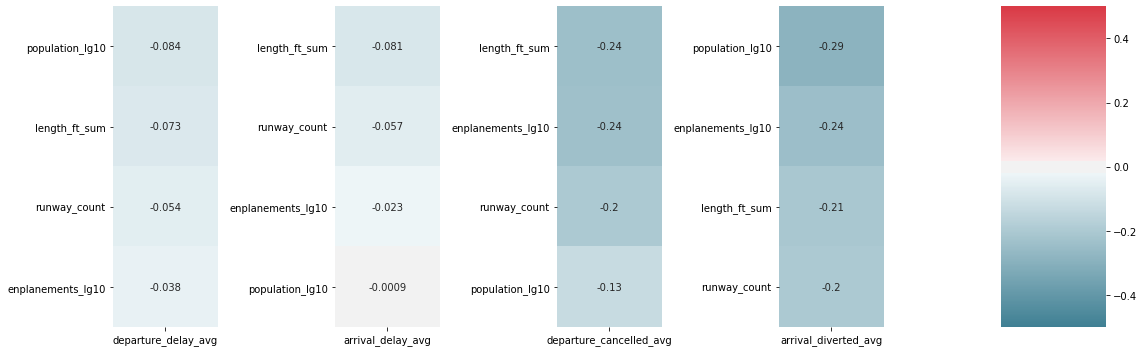

In [100]:
corrs = corrs.loc[:,["population_lg10", "enplanements_lg10", "runway_count", "length_ft_sum"]]
f, axes = plt.subplots(1, 5,figsize=(16,5))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
print('Correlation for scale properities with Airports in U.S. Mainland with Delay / Cancellation')
for i in range(4):
    rank = ((-corrs.iloc[i,:].abs()).argsort())
    rank = corrs.iloc[i,rank].to_frame(name=corrs.index[i])
    sns.heatmap(rank,vmin=-0.5,vmax=0.5,center=0.0,cmap=cmap,ax=axes[i],annot=True,cbar_ax=axes[4])
f.tight_layout()
plt.show(f)

most factors regarding the scale of the airport (<a href = "#scale_EDA">see this section of EDA</a>) are negatively correlated with delay/cancellation. **Scale factors have moderate negative correlation with delay / cancellation, but have nearly no correlation with delay.**

### According to EDA results, delay may be related to coast / non-coast.

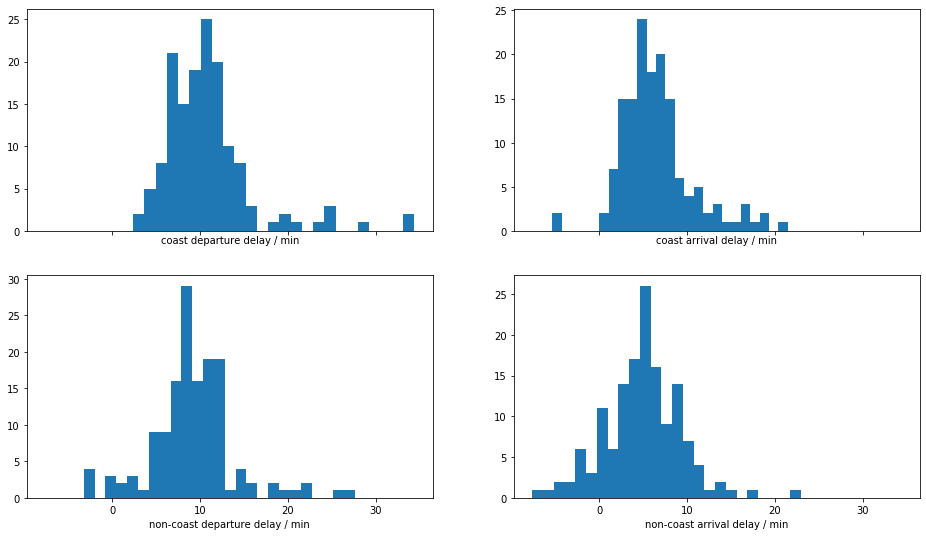

In [95]:
# https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_coastline
States_coast = ["FL","CA","LA","TX","NC","OR","ME","MA","SC","WA","NJ","NY","VA","GA","CT","AL","MS","RI","MD","DE","NH"]
combined = Y.merge(merged_X_df,left_index=True,right_index=True)
def is_coast(input_state):
    if input_state in States_coast:
        return True
    else:
        return False

coast_dep = combined[combined["state_id"].apply(is_coast)]["departure_delay_avg"]
non_coast_dep = combined[~combined["state_id"].apply(is_coast)]["departure_delay_avg"]

coast_arr = combined[combined["state_id"].apply(is_coast)]["arrival_delay_avg"]
non_coast_arr = combined[~combined["state_id"].apply(is_coast)]["arrival_delay_avg"]


f, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True,figsize=(16,9))
ax1.hist(coast_dep,bins=25,)
ax1.set_xlabel("coast departure delay / min");
ax1.set_label("count");
ax2.hist(coast_arr,bins=25)
ax2.set_xlabel("coast arrival delay / min");
ax2.set_label("count");

ax3.hist(non_coast_dep,bins=25)
ax3.set_xlabel("non-coast departure delay / min");
ax3.set_label("count");
ax4.hist(non_coast_arr,bins=25)
ax4.set_xlabel("non-coast arrival delay / min");
ax4.set_label("count");

Do they have the same distribution? 

We choose to do a Kolmogorov-Smirnov(KS) test to see if the distribution of delay time for airports in coastal states and non-costal states different (under alpha = 0.01).

In [96]:
stat_dep, pval_dep = stats.ks_2samp(coast_dep,non_coast_dep)
stat_arr, pval_arr = stats.ks_2samp(coast_arr,non_coast_arr)

print("P-value for coast / non-coast departure delay are different is :\t",pval_dep,"is there a significant difference? - ",pval_dep<alpha)
print("P-value for coast / non-coast arrival delay are different is :\t",pval_arr,"is there a significant difference? - ",pval_arr<alpha)

P-value for coast / non-coast departure delay are different is :	 0.06136630859757963 is there a significant difference? -  False
P-value for coast / non-coast arrival delay are different is :	 0.014719929203732995 is there a significant difference? -  False


The Kolmogorov-Smirnov test yields the following results: **Under alpha = 0.01, we failed to reject that there's no significant difference between costal / non-costal airport in terms of both departure and arrival delay distribution.**

### According to EDA results, flight cancel / divert rate may be related to coast / non-coast, with increasing rate in non coast region.

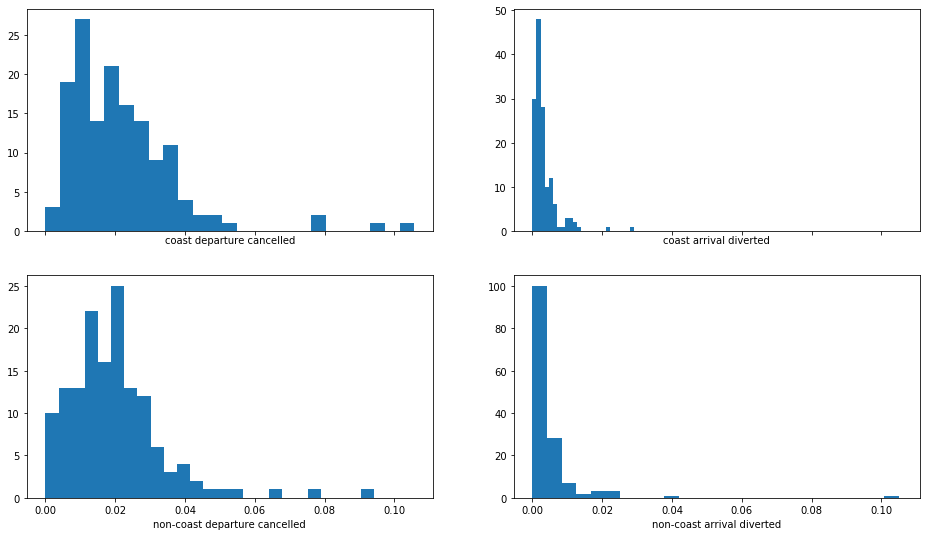

In [97]:
coast_can = combined[combined["state_id"].apply(is_coast)]["departure_cancelled_avg"]
non_coast_can = combined[~combined["state_id"].apply(is_coast)]["departure_cancelled_avg"]

coast_div = combined[combined["state_id"].apply(is_coast)]["arrival_diverted_avg"]
non_coast_div = combined[~combined["state_id"].apply(is_coast)]["arrival_diverted_avg"]

f, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True,figsize=(16,9))
ax1.hist(coast_can,bins=25,)
ax1.set_xlabel("coast departure cancelled");
ax1.set_label("count");
ax2.hist(coast_div,bins=25)
ax2.set_xlabel("coast arrival diverted");
ax2.set_label("count");

ax3.hist(non_coast_can,bins=25)
ax3.set_xlabel("non-coast departure cancelled");
ax3.set_label("count");
ax4.hist(non_coast_div,bins=25)
ax4.set_xlabel("non-coast arrival diverted");
ax4.set_label("count");

In [98]:
stat_can, pval_can = stats.ks_2samp(coast_can,non_coast_can)
stat_div, pval_div = stats.ks_2samp(coast_div,non_coast_div)

print("P-value for coast / non-coast flight cancel rate are different is :\t",pval_can,"is there a significant difference? - ",pval_can<alpha)
print("P-value for coast / non-coast flight divert rate different is :\t",pval_div,"is there a significant difference? - ",pval_div<alpha)

P-value for coast / non-coast flight cancel rate are different is :	 0.5954667686488045 is there a significant difference? -  False
P-value for coast / non-coast flight divert rate different is :	 0.007696546413517913 is there a significant difference? -  True


The Kolmogorov-Smirnov test yields the following results: **Under alpha = 0.01, we failed to reject that there's no significant difference between costal / non-costal airport in flight cancel rate. However, there is significant difference in flight diverted rate.**

As there is significant difference in the distribution of flight diverted rate, are there a significant difference in the mean of flight diverted rate for costal / non-costal airports? 

We choose to use the t-test to test. t-test assumes the mean of sample is normally distributed, but doesn't assume the sample itself is normally distributed. Therefore, according to the central limit theorem, means of samples of a finite variance approaches a normal distribution disregarding the origional distribution. Since we have `N=294`, it's safe to assume the sample mean follows a normal distribution.

In [99]:
t_val_div,p_val_div = stats.ttest_ind(coast_div,non_coast_div)

print("For mean of flight diverted rate in costal and non-costal airports:")
print("P-value for difference in flight diverted rate mean is : {0:.3g} is there a significant difference under alpha =".format(p_val_div),alpha,"? - ",p_val_div<alpha)
print("t-value for difference in flight diverted rate mean is : {0:.3g} Is it positive ? - ".format(t_val_div),t_val_div>0)

For mean of flight diverted rate in costal and non-costal airports:
P-value for difference in flight diverted rate mean is : 0.034 is there a significant difference under alpha = 0.01 ? -  False
t-value for difference in flight diverted rate mean is : -2.13 Is it positive ? -  False


With the t-test, we concluded that although they differ in distribution, **there is no significant difference in mean of flight diverted rate between coastal and non-coastal airports in our sample.**

# Ethics & Privacy
All of our datasets used in this project are sourced from public websites of Kaggle, Ourairports, Data World, NOAA, FAA and DHS. Datasets of airports firstly presented in Kaggle, Ourairports and Data World are publicly disclosed for the purpose of research and consulting and contain no personal information regarding any potential privacy issues. NOAA (National Oceanic and Atmospheric Administration), FAA(Federal Aviation Administration) and DHS(Department of Homeland Security) are all government-run agencies. Datasets regarding cities, climate and airports from the websites of these three entities are fully disclosed for public usage and do not contain private information of any specified person.Therefore, the datasets and the method by which we obtaining the datasets should not trigger any privacy concerns.


In this project, the main topic about airport delays that we are discovering does not cause any ethical issues. By utilizing data science, we attempt to find out the variables that might cause airport delays and try to, to some extent, provide useful advice and insights regarding this one of the most commonly discussed topics in the world for both academic research and public interest.


One minor ethical concern as we deal with the bird strike dataset is that the classification of the strike effects is not specified enough and may cause some bias. The strike effects are collected as either 'No damage' or 'Caused damage', but the level of the caused damage is not quantitative. For example, some airports may have 20 bird strikes with little damage per year while some airports may have 2 bird strikes per year that can cause severe damage and casualties. But based on the dataset alone, one may conclude that the airport with 20 bird strikes is facing a more hazardous situation which can be a biased conclusion. The potential risk of threatening some other airports with less amount but more fatal bird strikes may be neglected. We need to consider that the bird strike data can be biased.


Another ethical concern is that we can not be fully confident that the data and the analysis we obtain can represent all airports across the world. The datasets we analyze are concentrated upon domestic airports and therefore exclude airports that are located in overseas regions outside of the U.S..Thus we may not be able to conduct equitable analysis or provide any solid insights regarding all airports in the world.


# Conclusion & Discussion

**The scope of this study is: U.S. mainland domesticated flight delay of airports with >= 50 departures annually.**

In summary, looking back at all 24 features of an airport that we listed in the research question, we only found support for **three possible correlations with our data analysis**: (1) Regarding the geographic factors, the **longitude of an airport has a positive correlation with the flight delay/cancellation rate**, which contradicts with our hypothesis; (2) Regarding the environmental factors, the **precipitation in an airport's proximity has a positive correlation with the flight delay/cancellation rate**, which aligns with our hypothesis. In EDA we proved that these two predictors are significantly correlated with geographical location, therefore **geographical location** is another possible covariate. However, by the KS-test, we found that **There's no significant difference in the distrubition of flight delay/cancellation rate between airports in costal and non-costal states.** and **although costal and non-costal airports have significantly different distribution of flight diverted rate, there's no significant difference in its sample mean.**  

In addition, with a combination of correlations of multiple features (<a href = "#scale_EDA">see this section of EDA</a>), as well as support from previous study results (Stone, 2015) mentioned in the Background, we acquired **another possible correlation that the scale of an airport is negatively correlated with the flight cancellation / diverted rate.** 

The present project respectively analyzed correlations between each attribute of U.S. airports and each unpleasant moment of domestic flight in 2018-- either delayed, canceled or diverted. It showed that except few correlations are moderate (e.g correlation between average diversion rate and the latitude of the airport), most can just be interpreted as weak or no correlation. Even though it can answer the research question with reasonable details, it is, however, implausible to provide a concrete solution of minimizing unpleasant flight experiences in reality, and more features needed to be considered and experiments need to be set up to establish causality. 

More issues need to be explored in future work concerns:

First, current variables can not accurately describe real-world data about airports and flight experiences. Lack of fluidity, the average performance of flight in 2018 can not show its relationship with different time period within a year and the overall trend through multiple years, which may lead to huge changes in economics, ecology, etc. And since variables are selected according to a few previous studies and our common sense, it is possible that we ignore some essential features and thus failed to find a strong correlation between airports and flight experiences.

The second issue can be addressed in the future work is that we can analyze relationships of more than one predictor variable with each outcome variable. Combinations of certain airport attributes may have larger correlations to flight experiences compared to that of one single attribute. Moreover, without combined attributes, one-to-one correlations may lead to confusing conclusions. For example, the negative correlation between strike_avg (average bird strike extent) and departure_delay_avg (average delay of all flights originated from this airport) indicated that more bird strikes can lead to less delay time, which does not conform to common sense.

